In [8]:
#import common modules
import numpy as np
from sklearn.model_selection import train_test_split

#import own modules
from source.matrix_creation import polynomial_features,scale_features_by_intercept_use,standard_scaler
from source.plotting_exploration import explore_iterations_GD_methods_ridge,explore_iterations_GD_methods_OLS
from source.plotting_exploration import explore_n_epochs_stochasticGD_ridge,explore_n_epochs_stochasticGD_OLS

## Notebook for assignment 1 part f

Generating analysis plots for assignement 1 part f exploring Stochastic Gradient Descent. 

* Functions for the main methods can be found in source/stochastic_OLS.py and source/stochstic_Ridge.py
* Functions generating and scaling the feature matrix can be found in source/matrix_creation.py 
* Functions for calculating errors can be found in source/errors.py
* Functions for plotting and exploration can be found in source/plotting_exploration.py


### Setup for constants

In [9]:
# Runge's function - parameters to explore
n_datapoints = 200
standard_deviation = 0.1 # for noise
p = 15 # polynomial degree

lambda_range = (-1,-5) # range of lambda values for np.log
lambda_n = 20 # number lambda values to explore
lambdas_start = np.logspace(lambda_range[0],lambda_range[1],lambda_n) # lambdas generated in logspace for learning rate

# Grid search
etas = [0.001, 0.005, 0.01, 0.05, 0.1] # gradient descent parameters

# tolerance criteria for gradient descent methods
tolerance = 1e-6
max_iterations = 1000

use_intercept = True 
create_plots = False
verbose_bool = False

np.random.seed(250)  # ensure reproducibility numpy
random_state_int = 42   # ensure reproducibility train_test_split

In [10]:
eta = 0.001
lam = 0.01
size_minibatch = 10
num_epochs = [10,50,100,1000,10000,100000]

### Generate Runge's function data

In [11]:
# generating data without noise
x = np.linspace(-1, 1, num=n_datapoints)
y = 1 / (1 + 25 * x**2)

# generating data with noise
x_noise = x
y_noise = 1 / (1 + 25 * x_noise**2) + np.random.normal(0, standard_deviation, n_datapoints)

### Generate feature matrix, scale and split into training and test data

#### No noise

In [12]:
# creating design matrix with polynomial features: p
X = polynomial_features(x, p,intercept=use_intercept) # intercept=True gives intercept column = 0 in standard scaler if intercept is True, and hence division by 0. 

# split x for plotting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state_int)
# test and train dataset, and scaling of X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state_int)
X_train_scaled, X_test_scaled, X_train_mean, X_train_std = scale_features_by_intercept_use(X_train, X_test, use_intercept)
# scaling of y_train and y_test
y_train_scaled, y_test_scaled, y_train_mean, y_train_std = standard_scaler(y_train, y_test)

#### With noise

In [13]:
# creating design matrix with polynomial features: p
X_noise = polynomial_features(x_noise, p,intercept=use_intercept) # intercept=True gives intercept column = 0 in standard scaler if intercept is True, and hence division by 0. Leaving intercept out since Ridge regression handles this

# test and train dataset, and scaling of X_train and X_test
x_train_noise, x_test_noise, y_train_noise, y_test_noise = train_test_split(x_noise, y_noise, test_size=0.2, random_state=random_state_int)
X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(X_noise, y_noise, test_size=0.2, random_state = random_state_int)
X_train_scaled_noise, X_test_scaled_noise, X_mean, X_std = scale_features_by_intercept_use(X_train_noise, X_test_noise, use_intercept)
# scaling of y_train and y_test
y_train_scaled_noise, y_test_scaled_noise, y_train_mean_noise, y_train_std_noise = standard_scaler(y_train_noise, y_test_noise)

### Analysis

In [14]:
num_points = len(X_train)

#### Stochastic Gradient Descent without noise

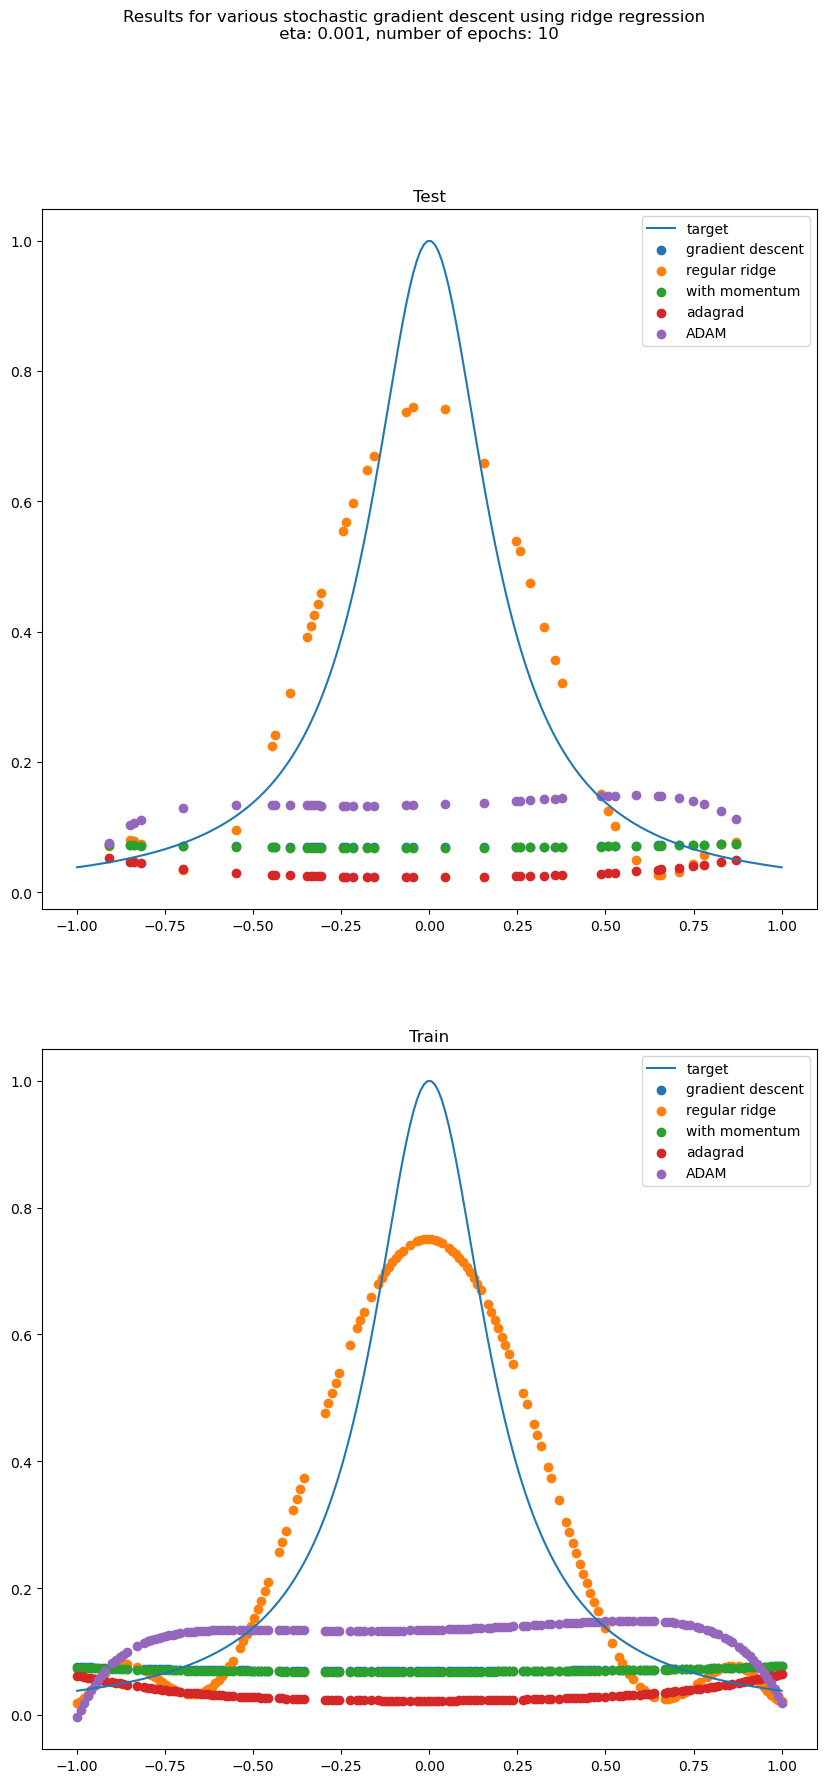

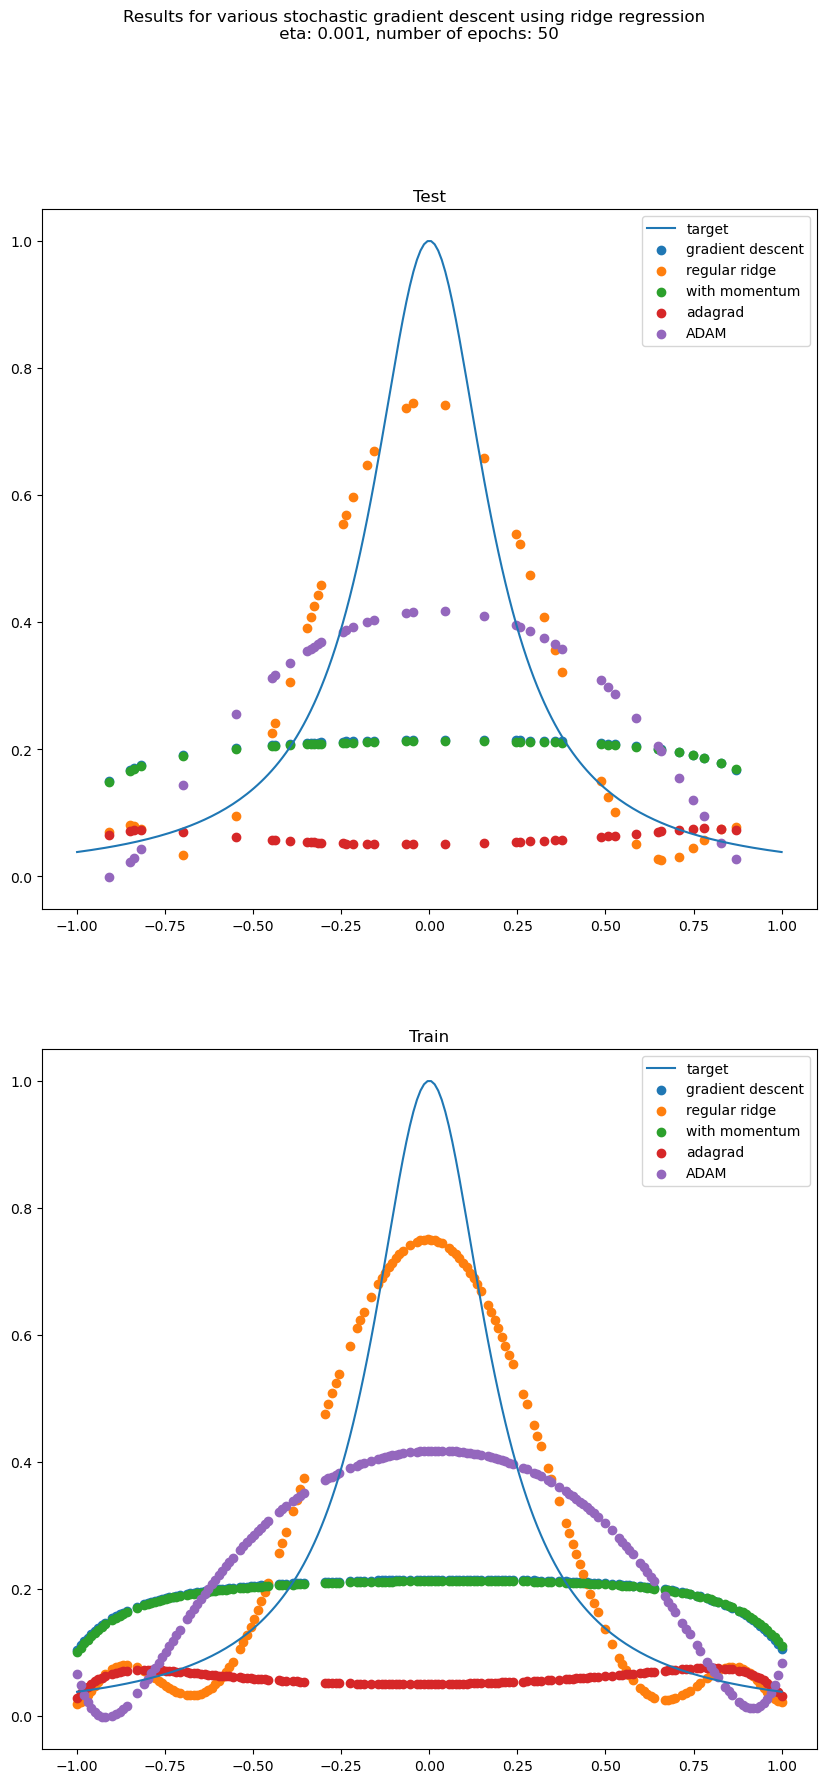

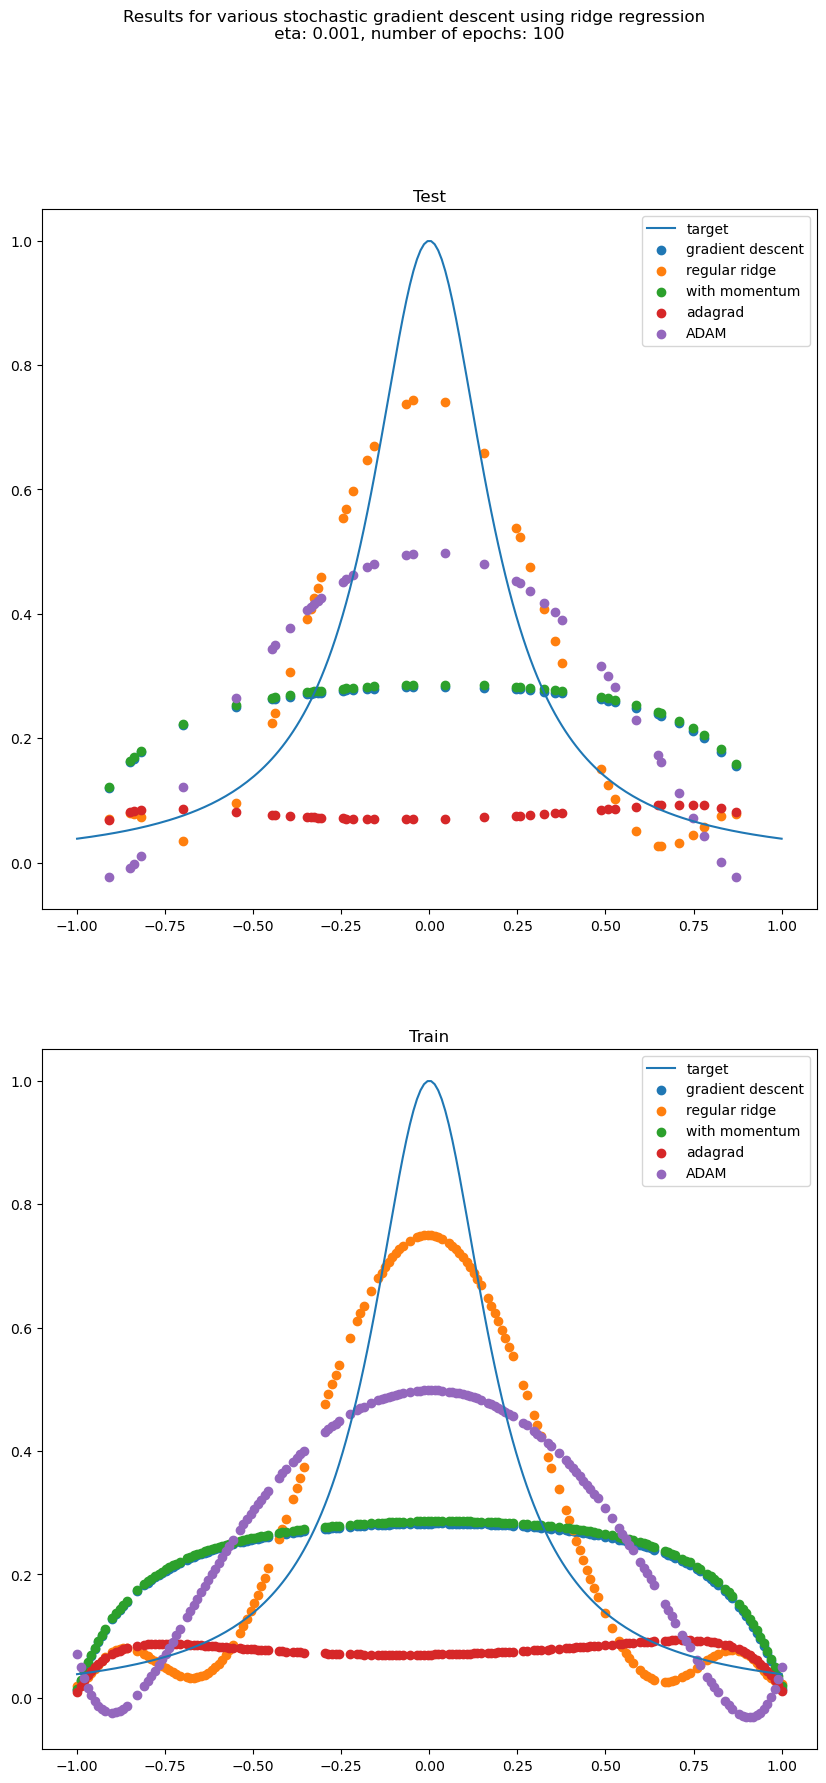

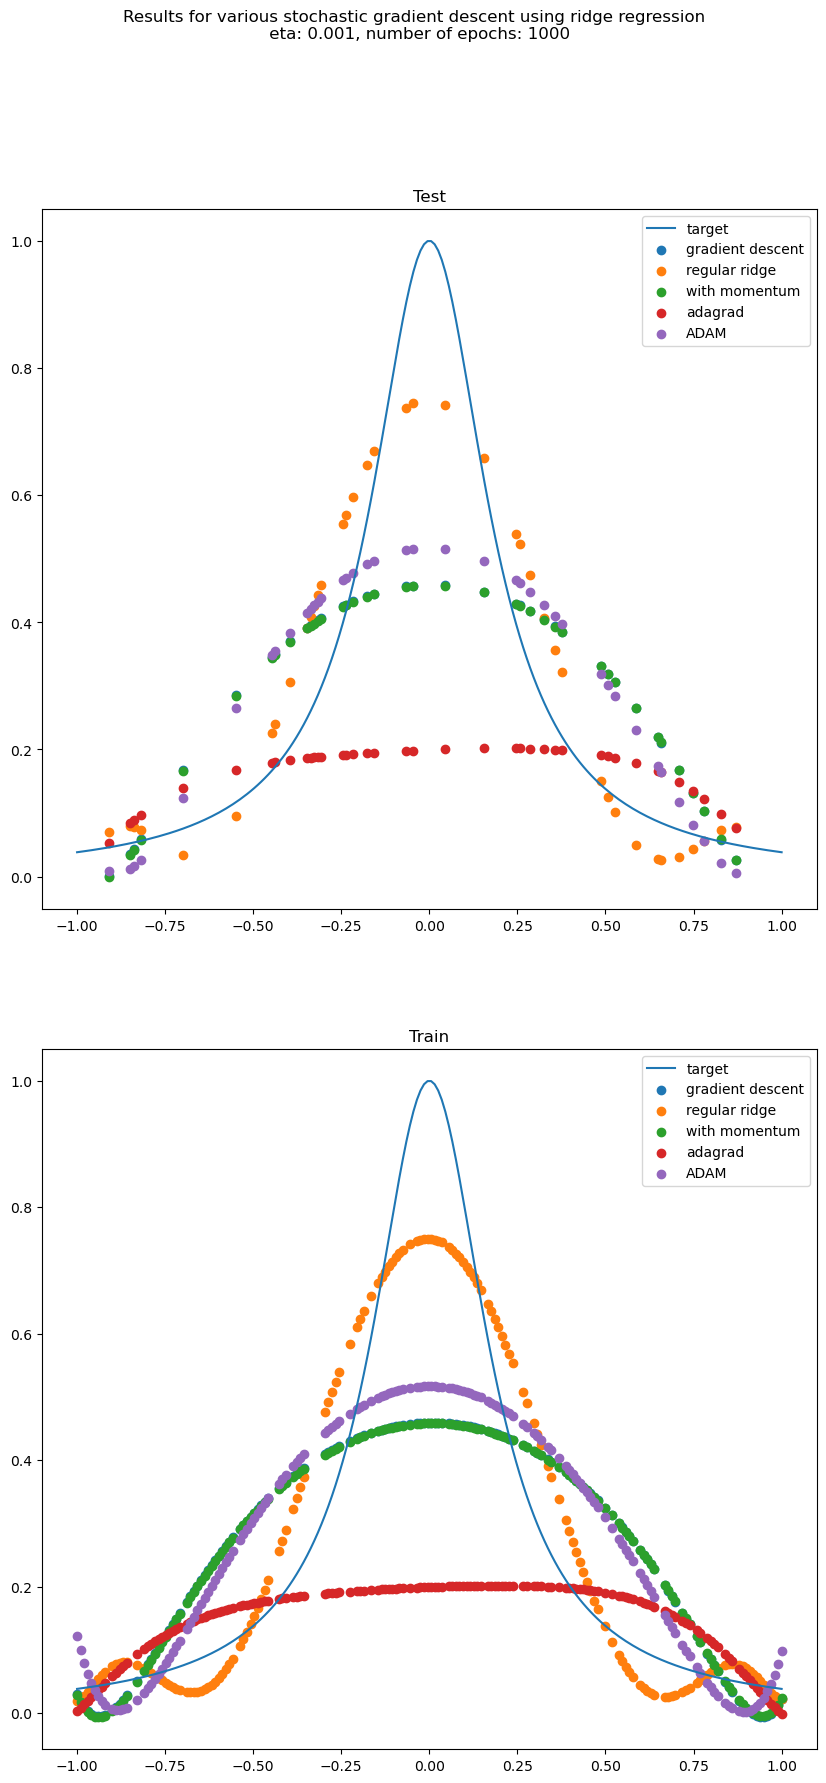

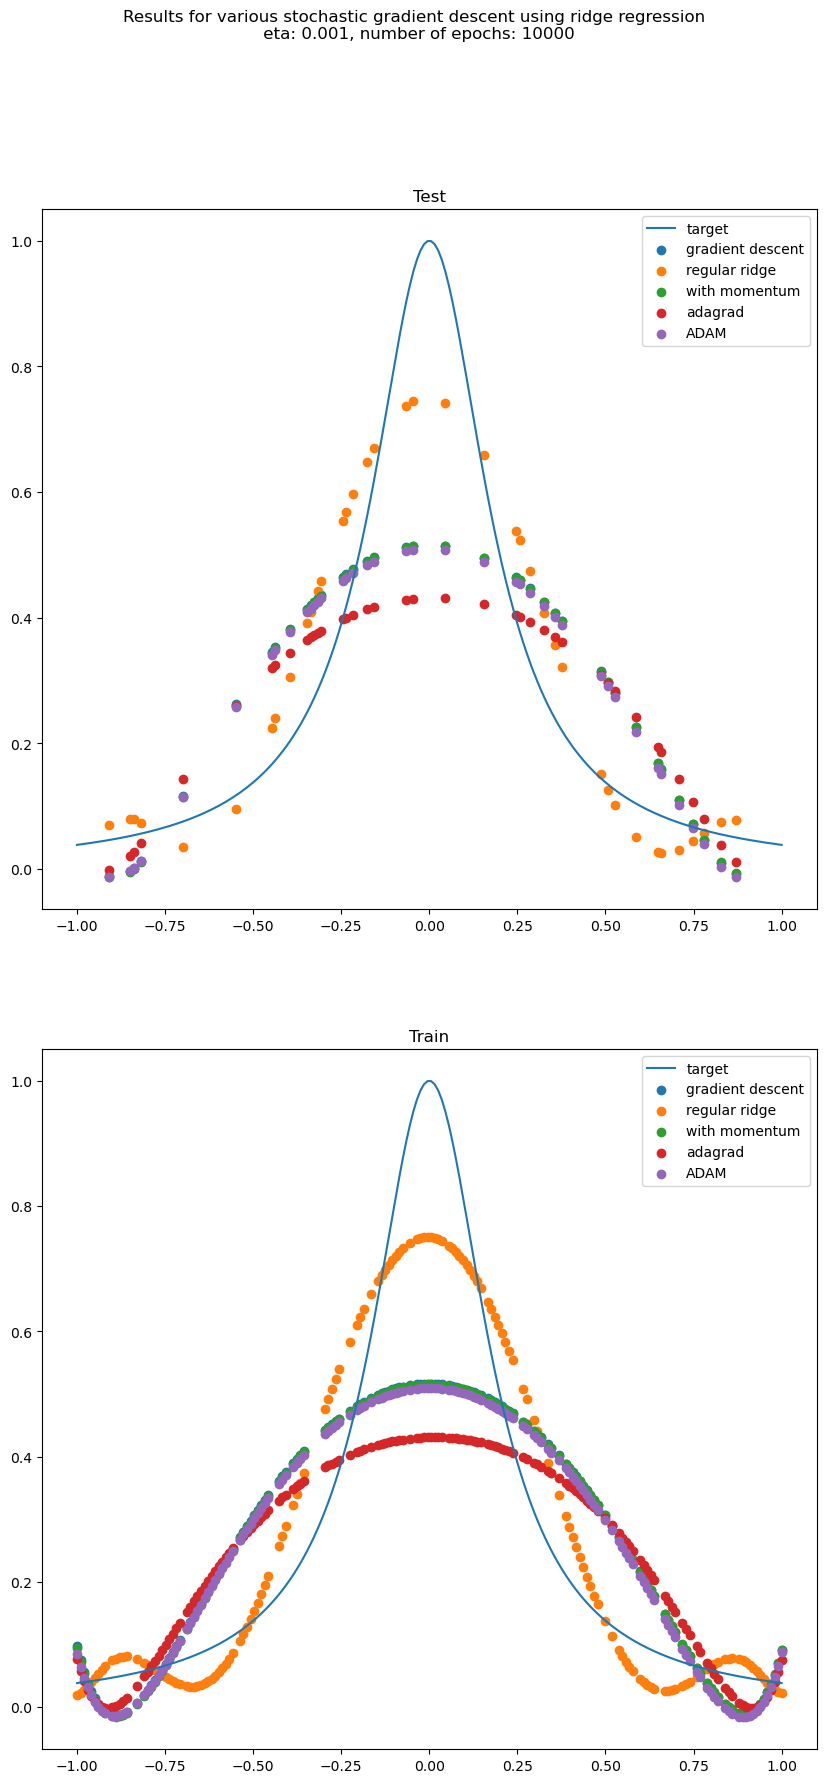

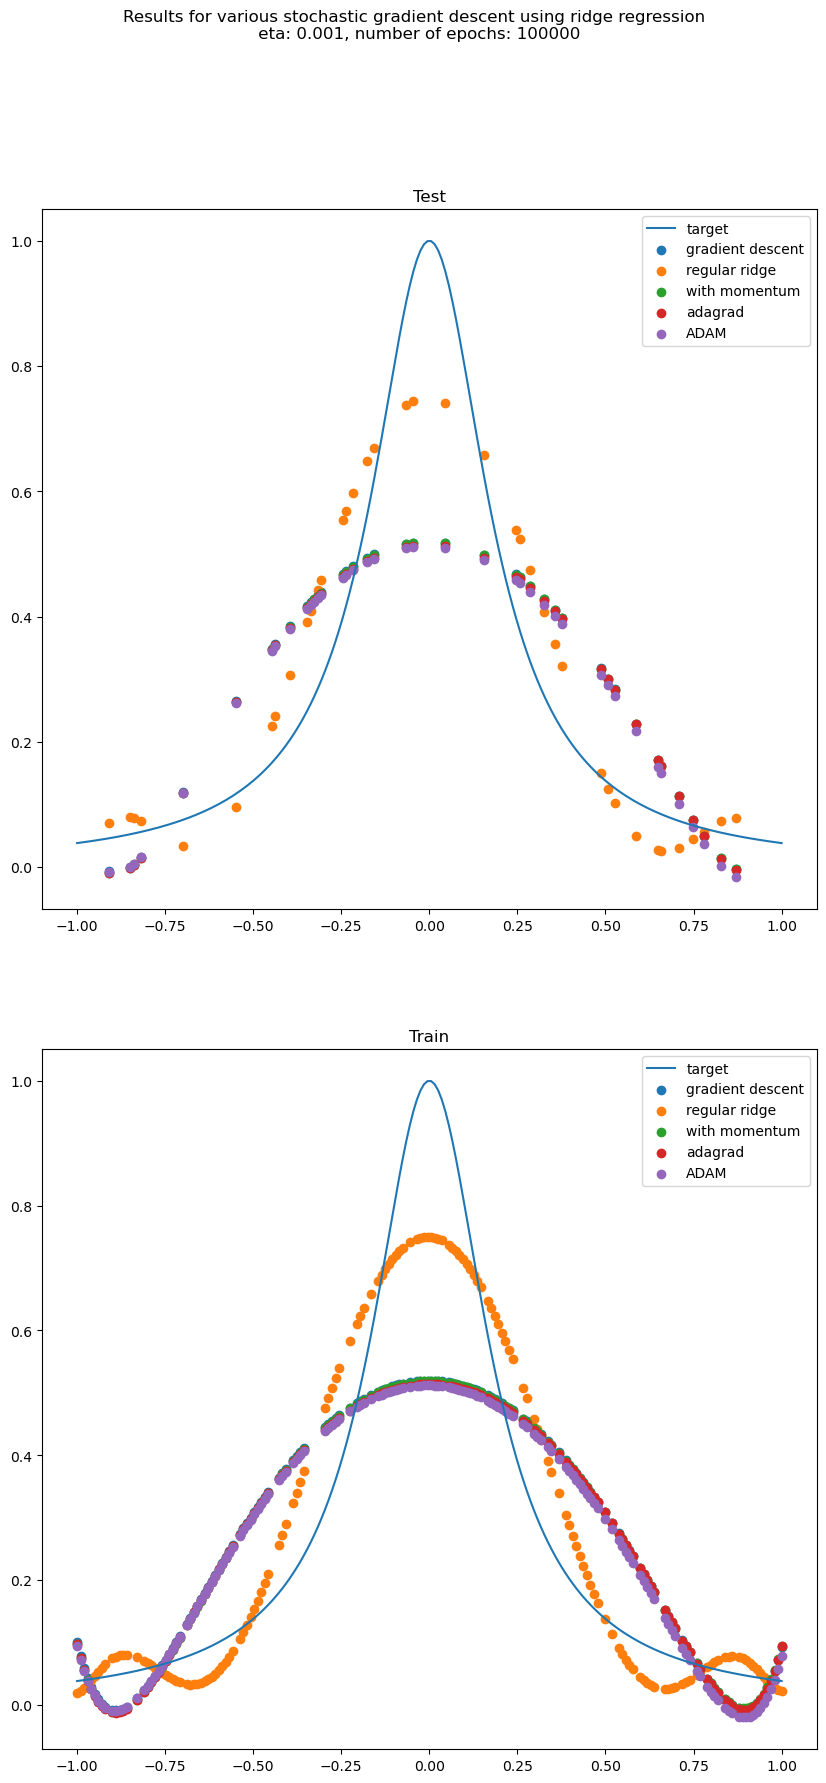

In [15]:
explore_n_epochs_stochasticGD_ridge(num_epochs,num_points,size_minibatch,eta,lam,x,y,x_train,x_test,X_train,X_test,y_train)


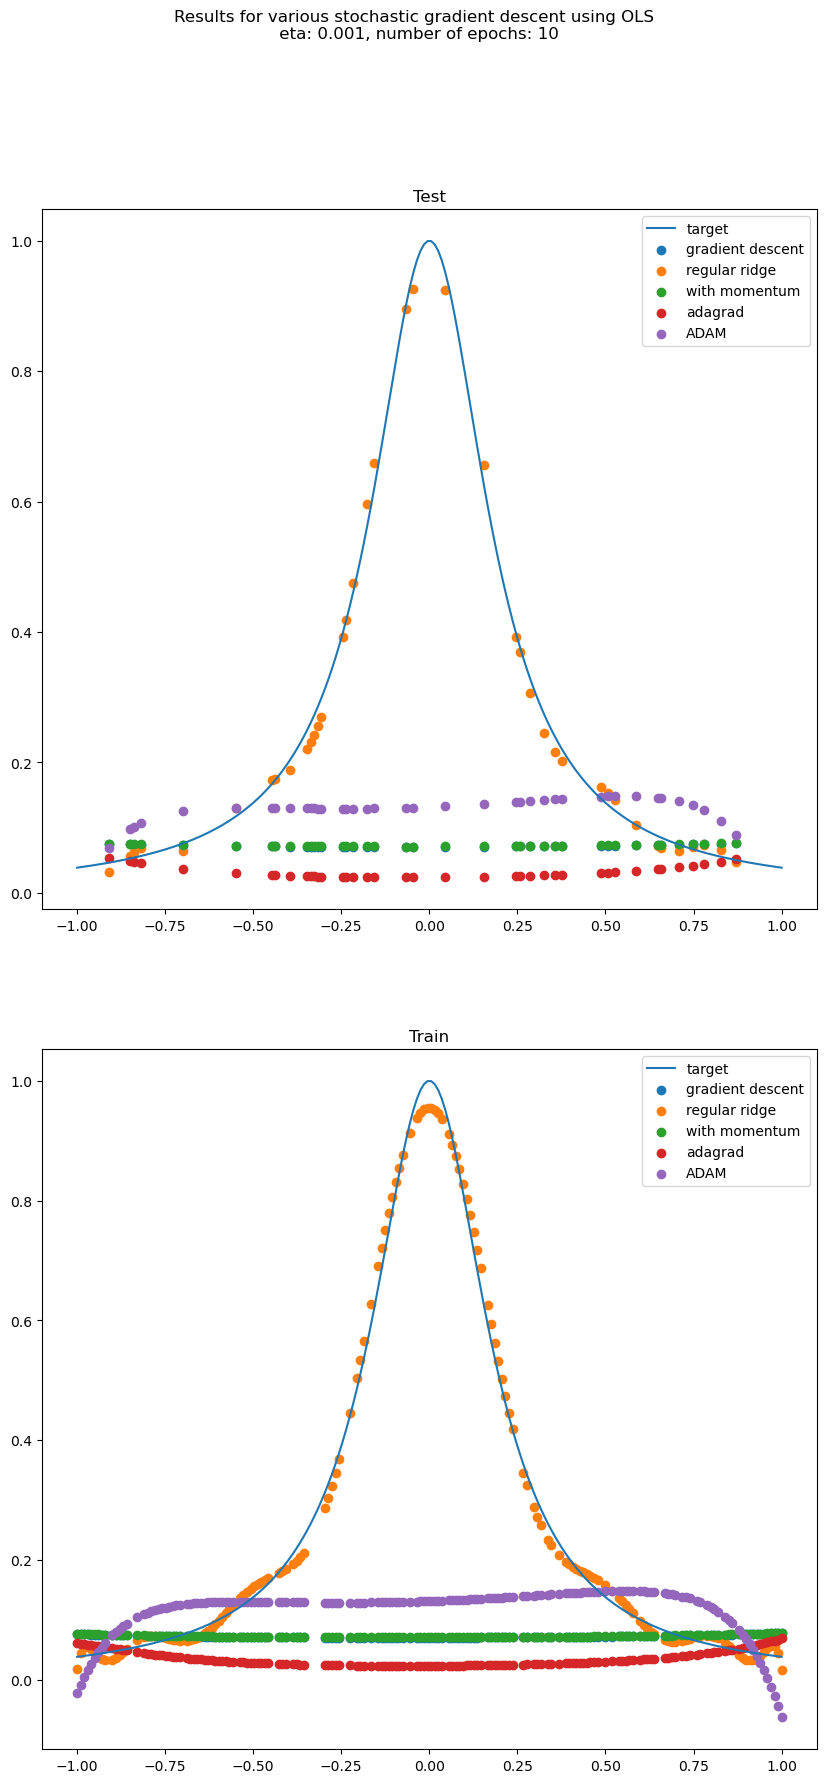

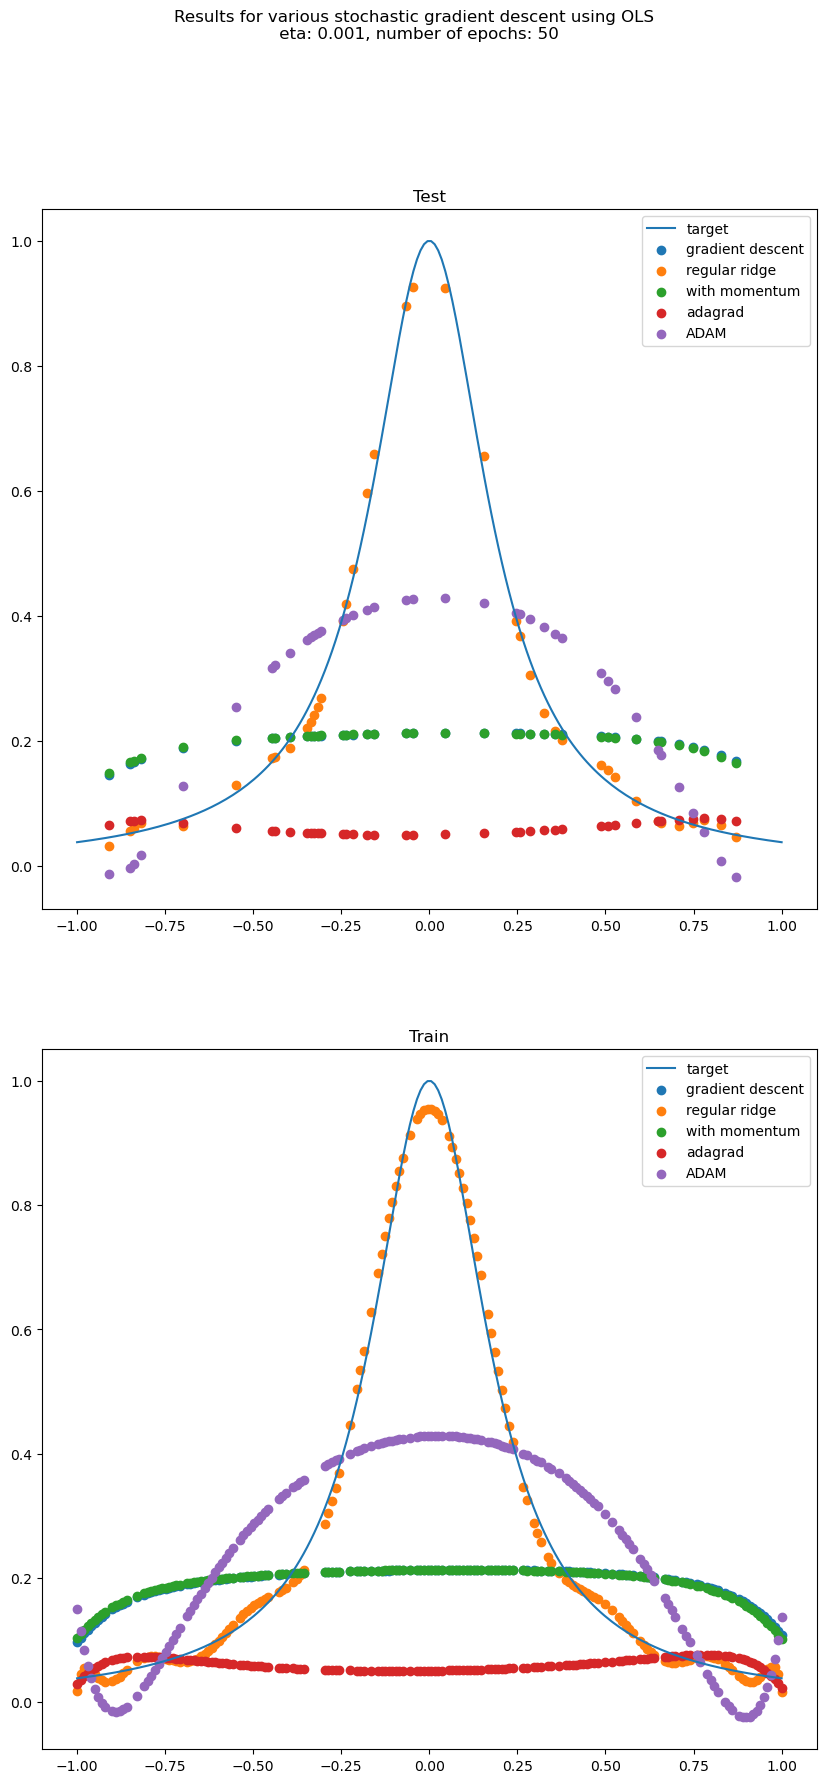

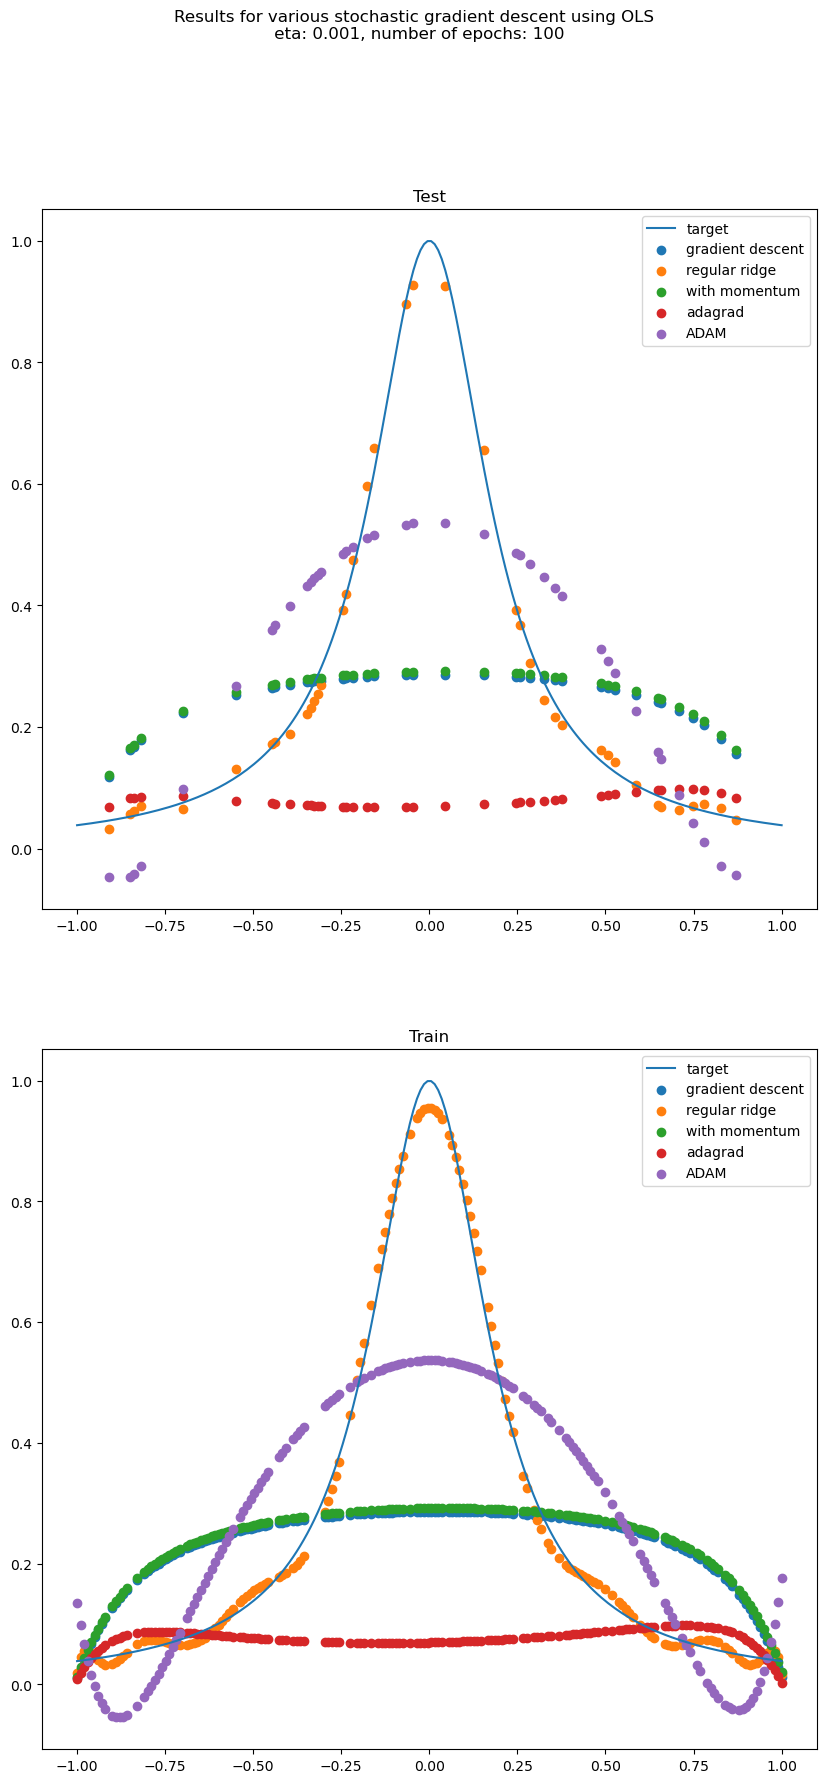

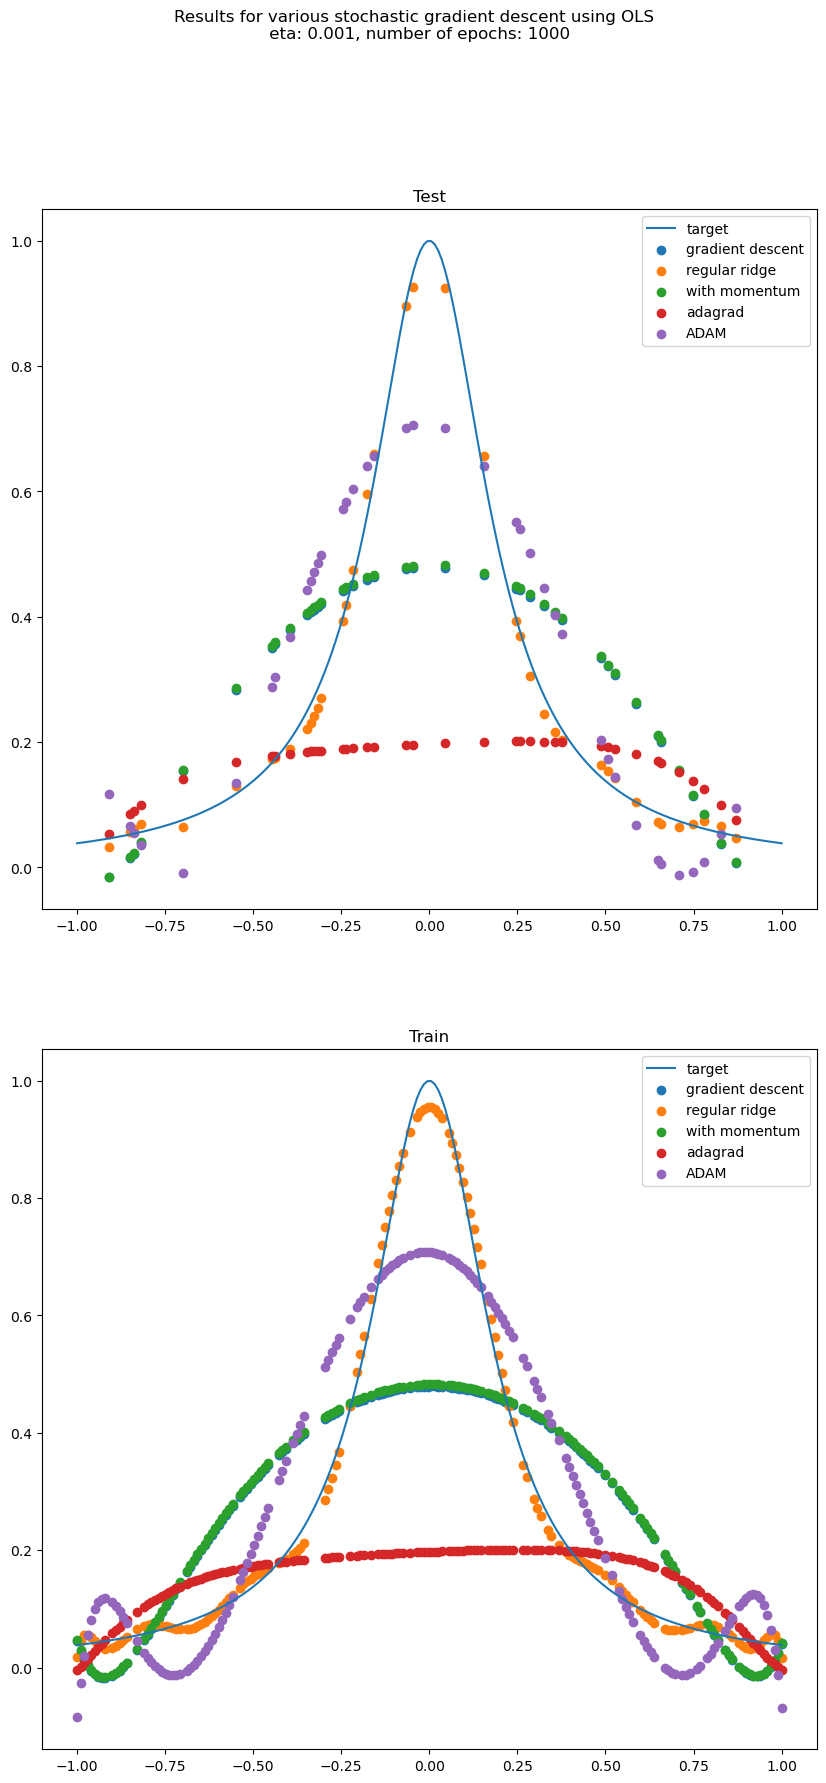

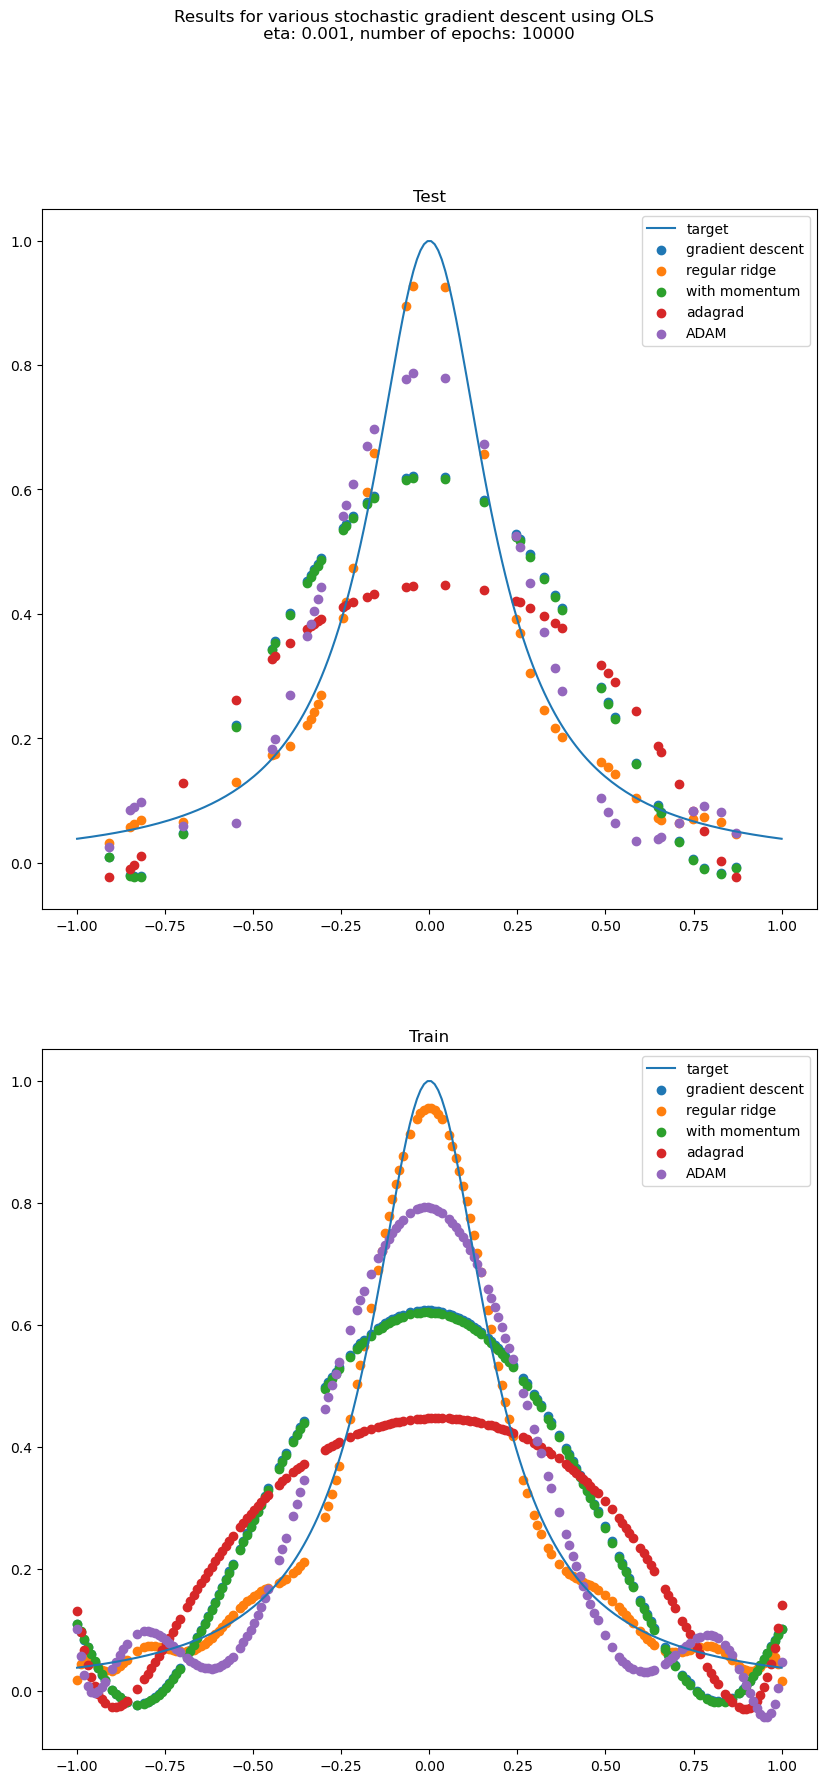

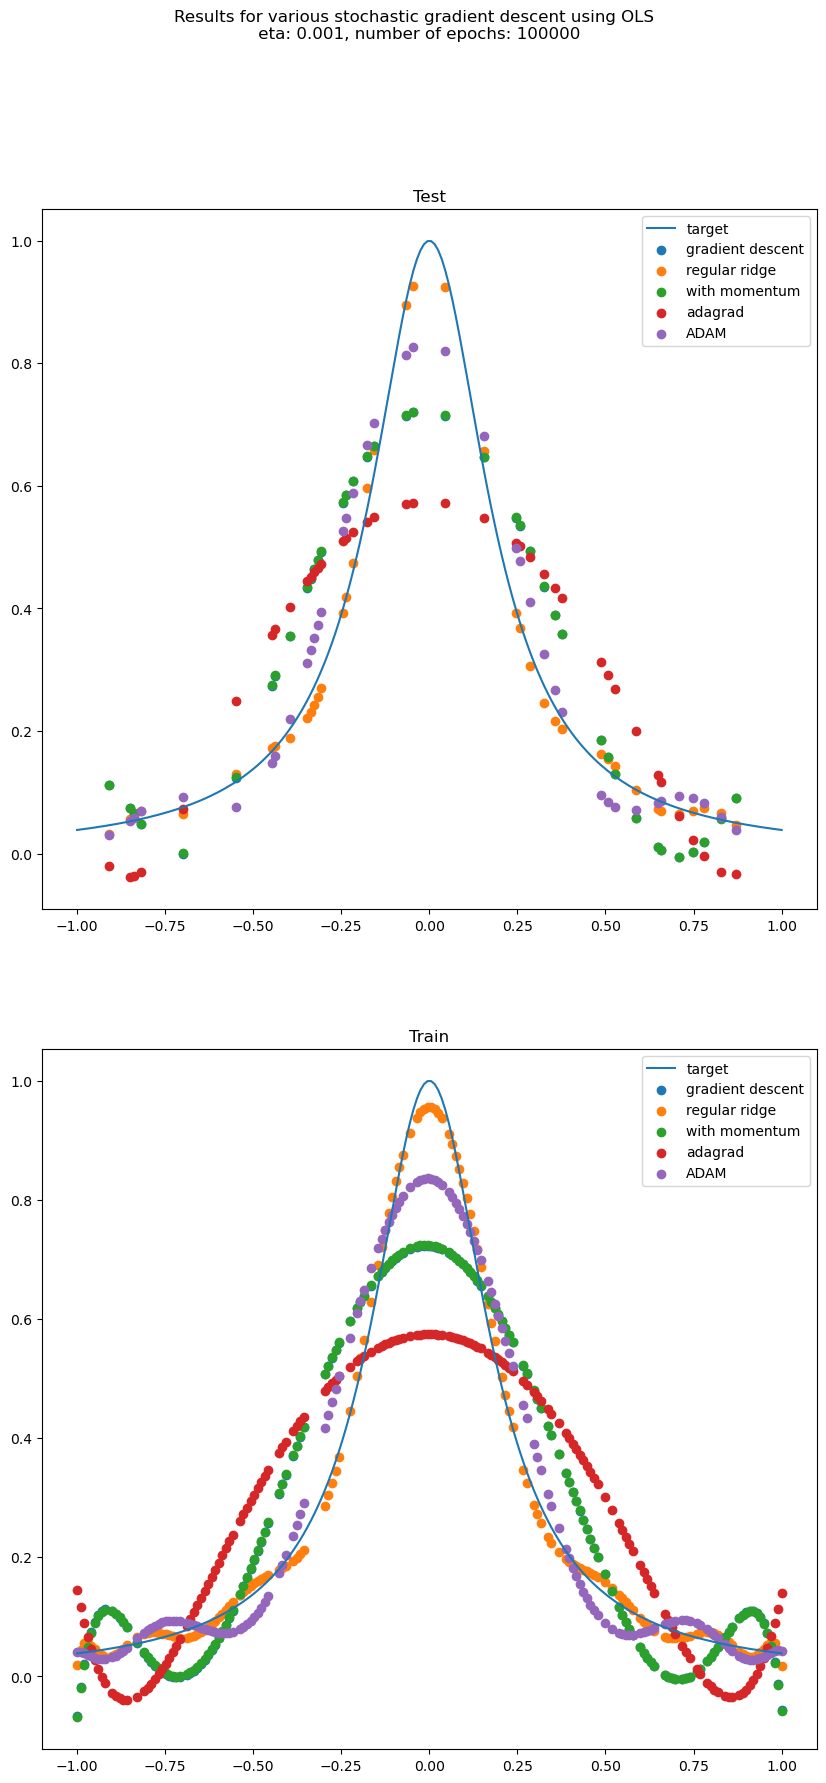

In [16]:
explore_n_epochs_stochasticGD_OLS(num_epochs,num_points,size_minibatch,eta,x,y,x_train,x_test,X_train,X_test,y_train)


#### Stochastic Gradient Descent with noise

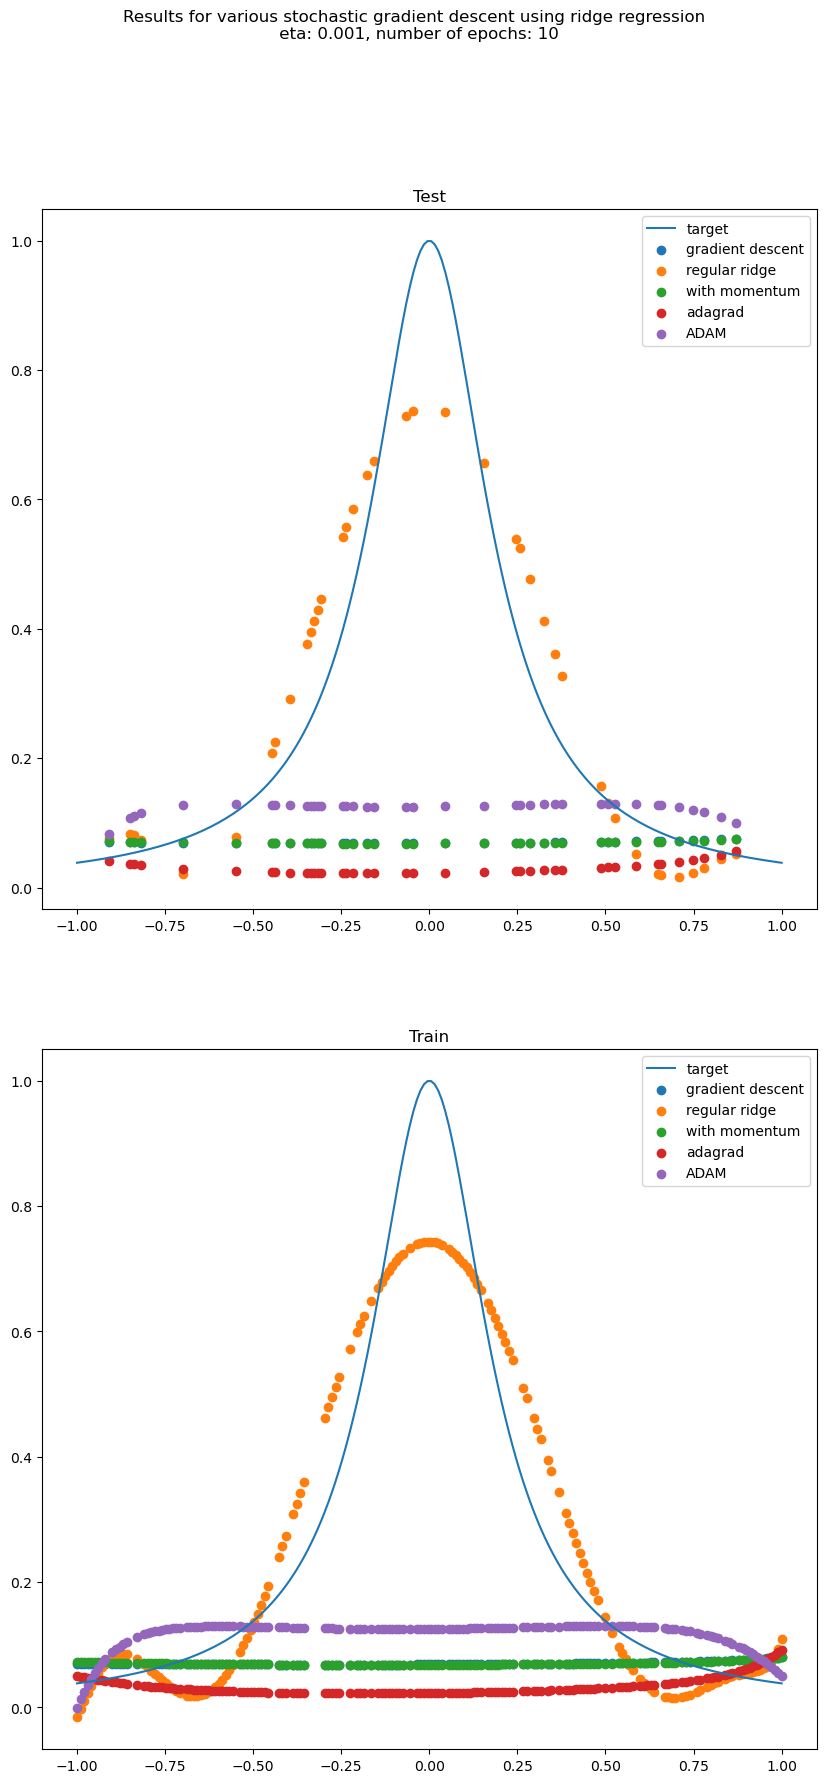

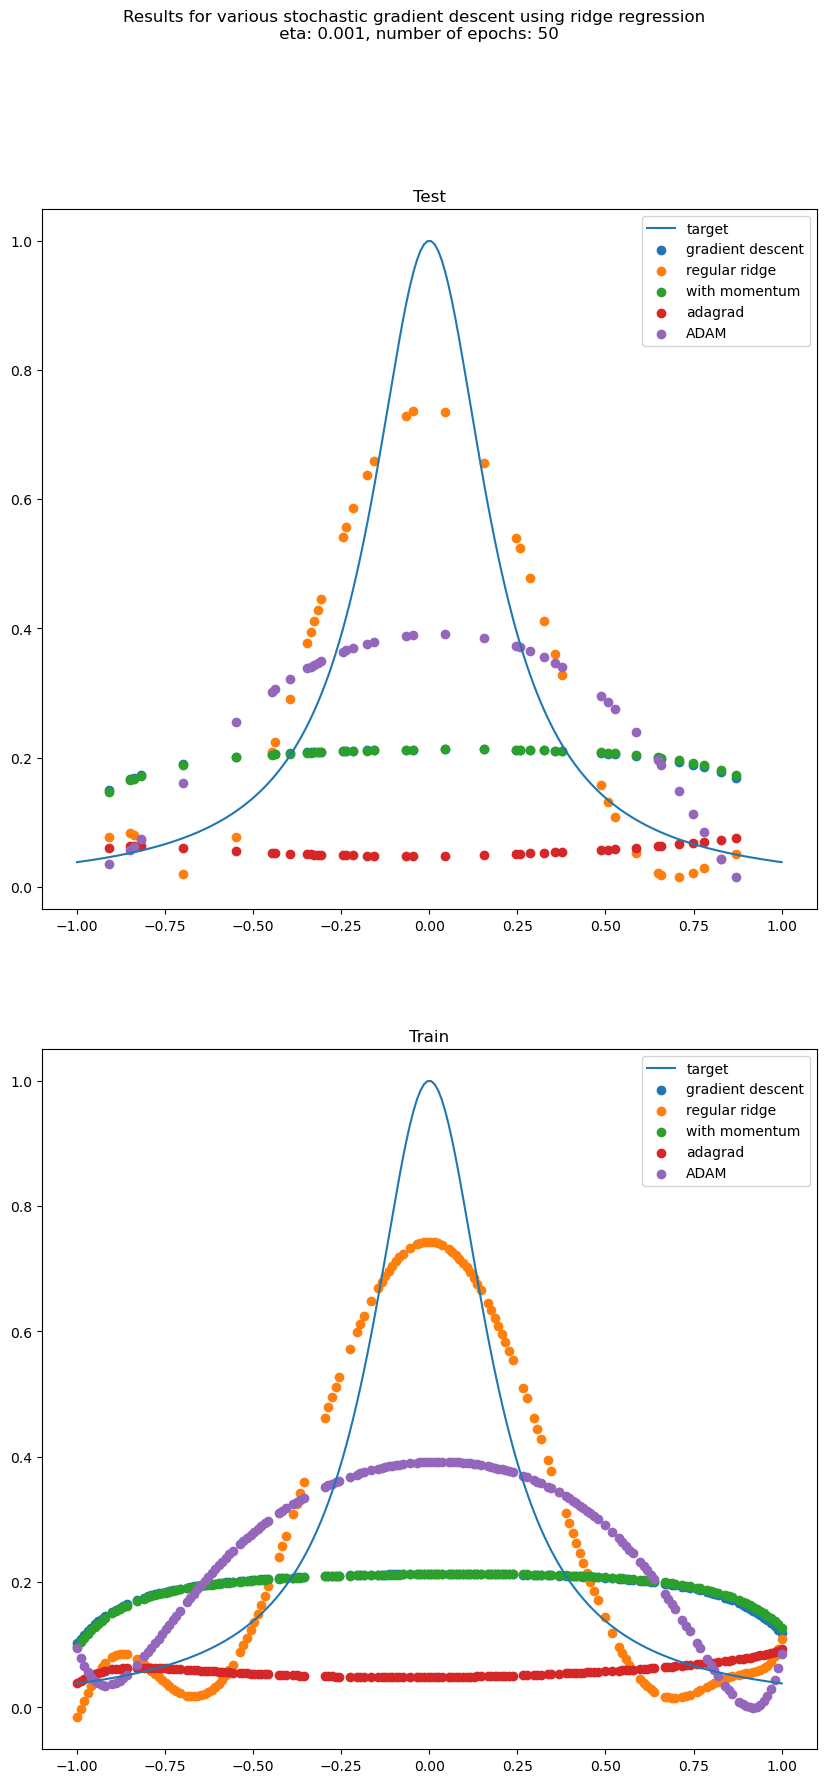

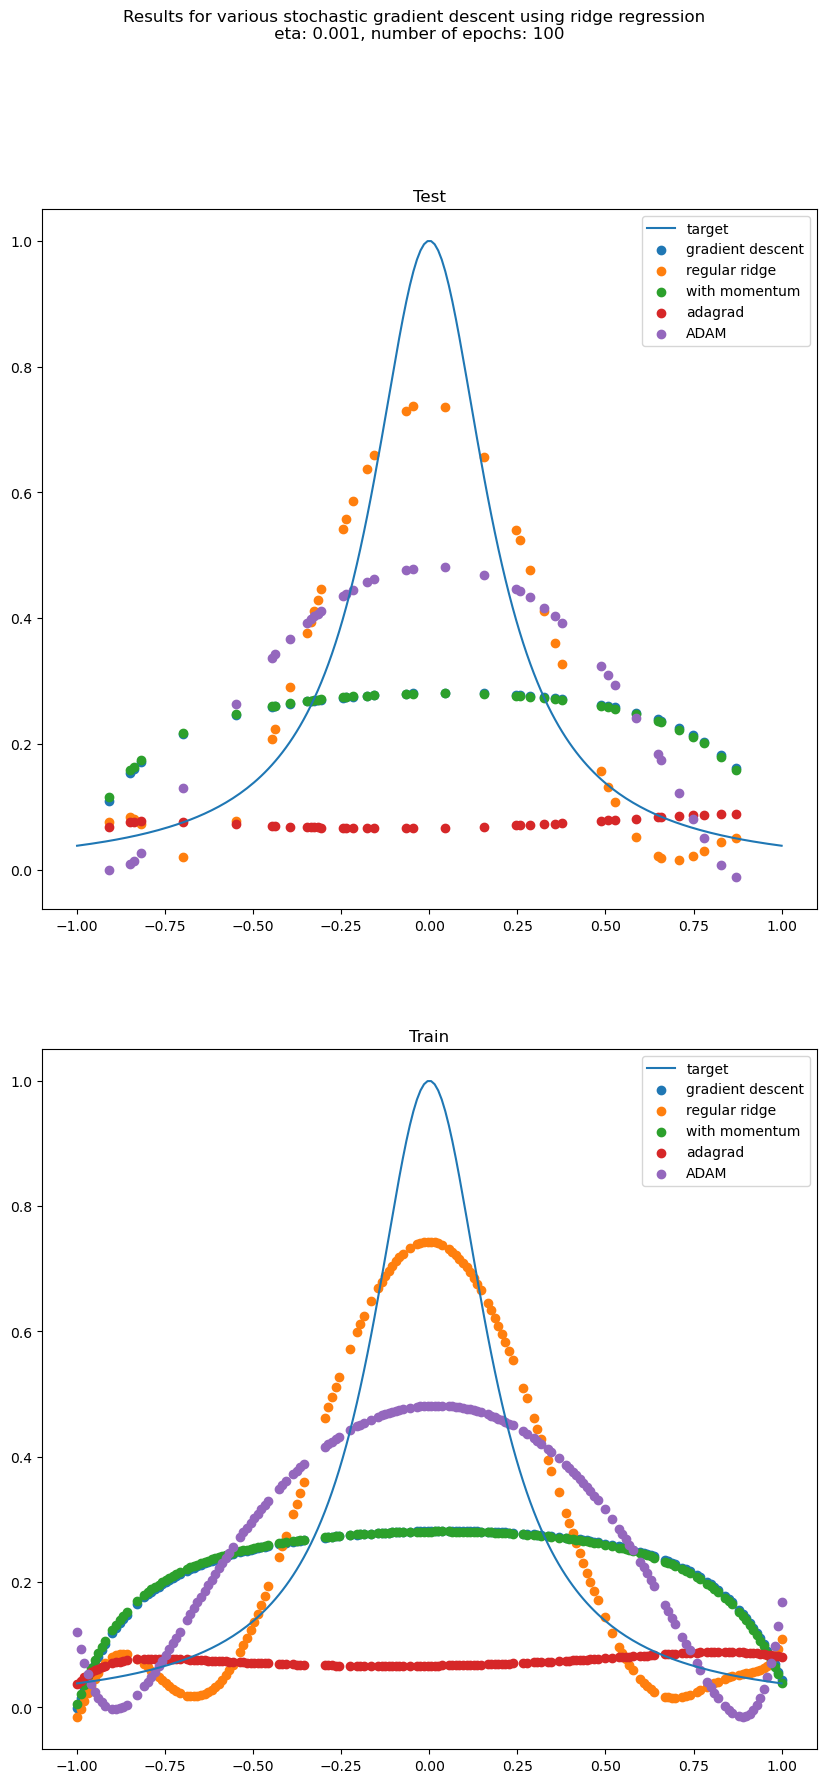

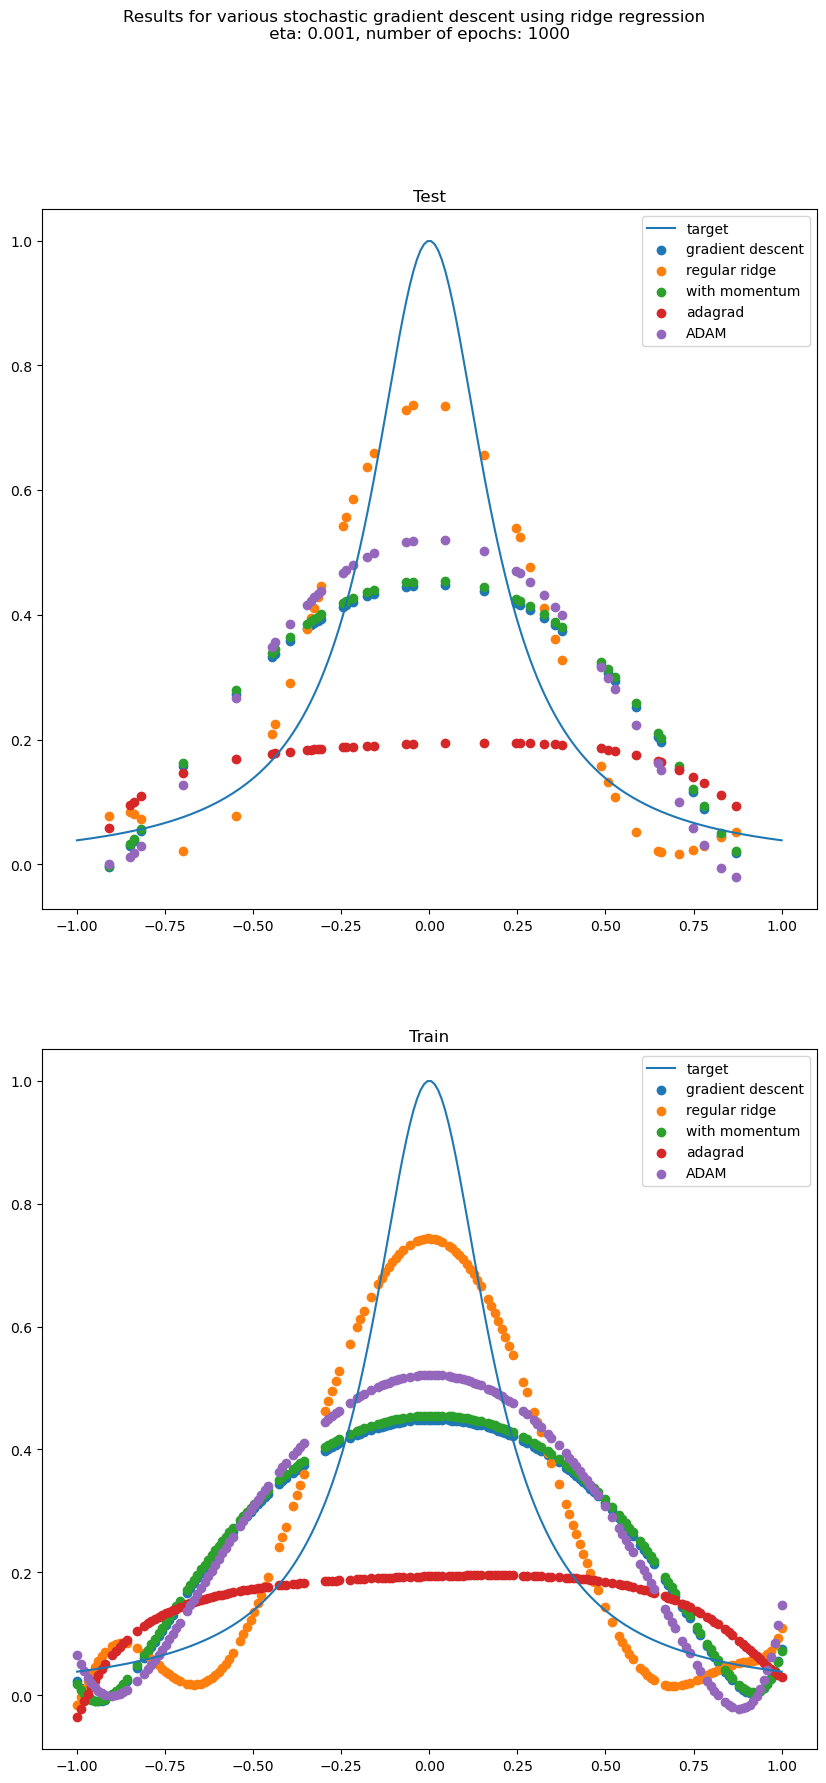

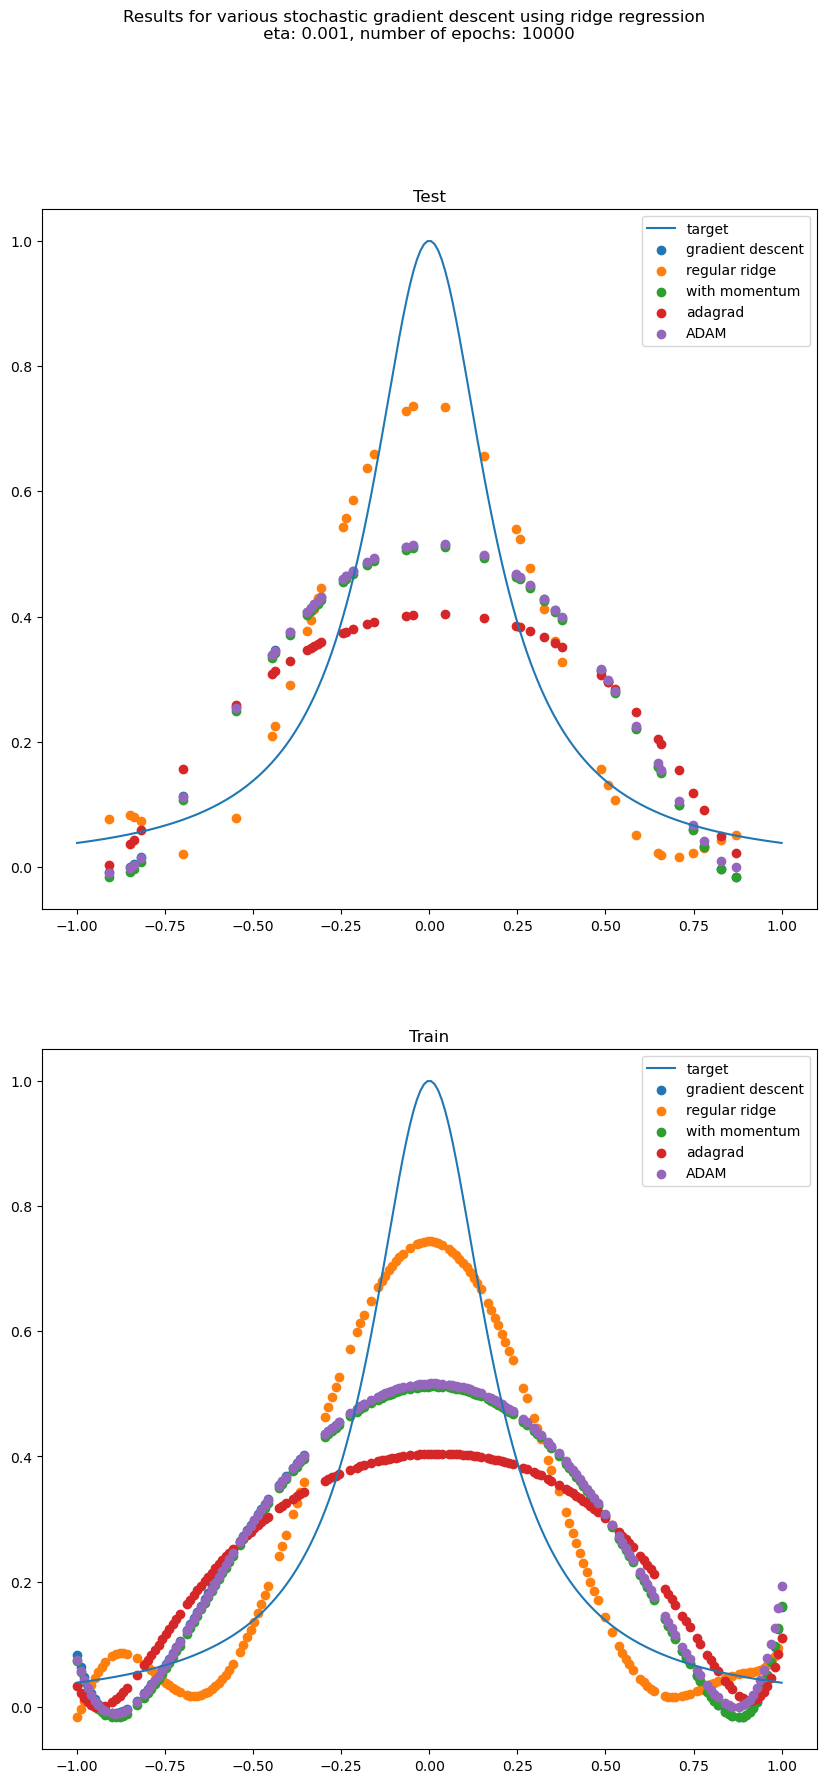

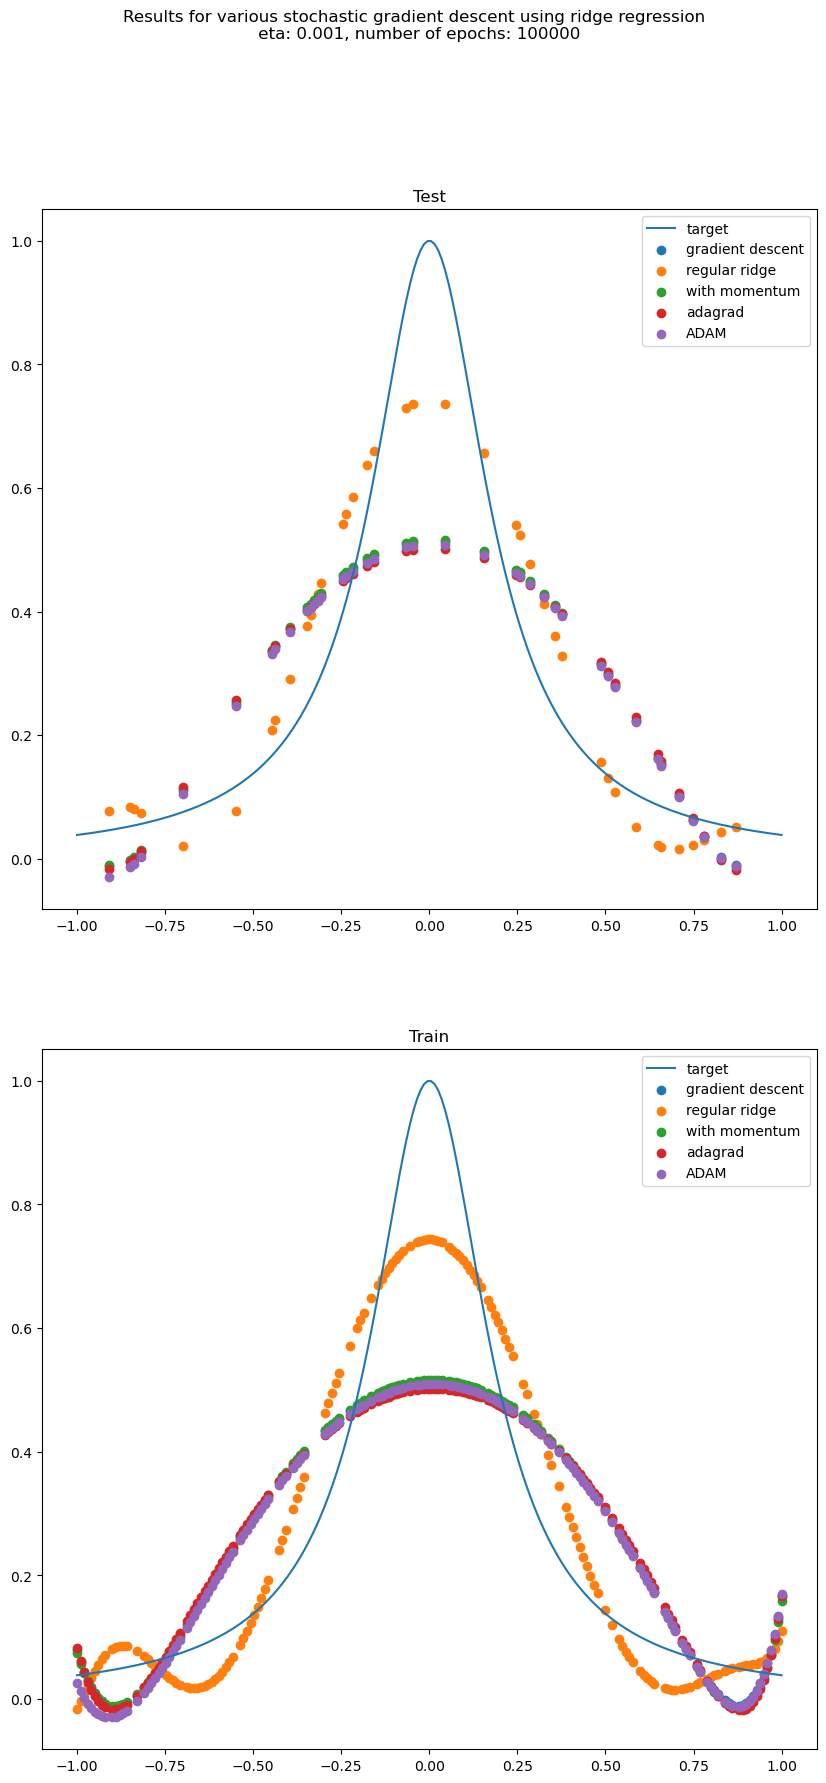

In [17]:
explore_n_epochs_stochasticGD_ridge(num_epochs,num_points,size_minibatch,eta,lam,x,y,x_train_noise,x_test_noise,X_train_noise,X_test_noise,y_train_noise)


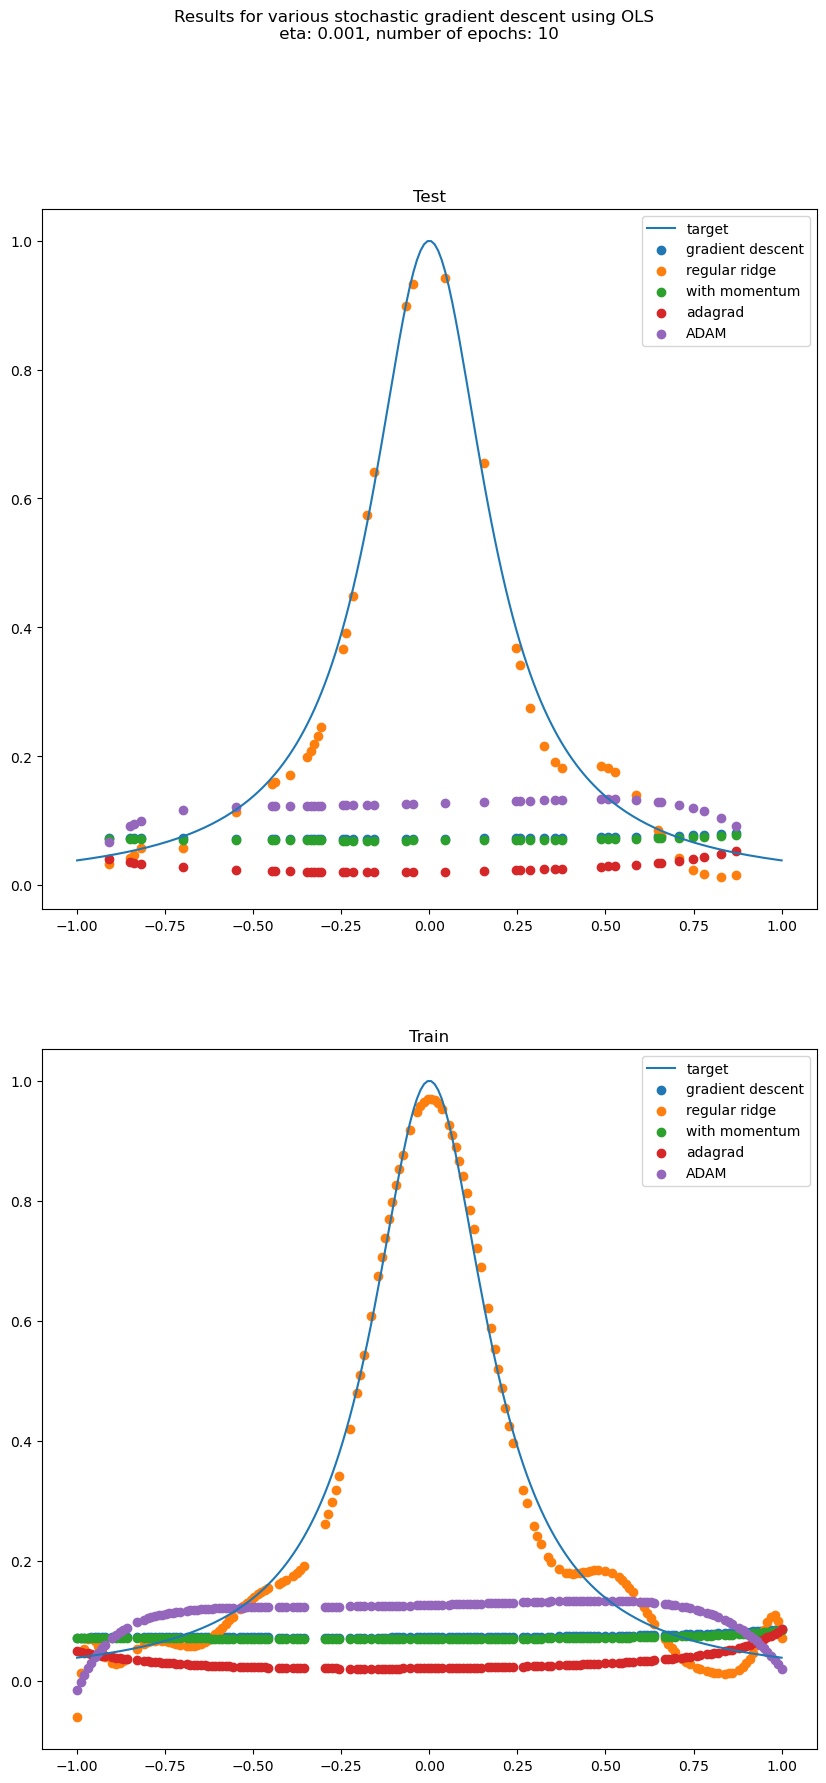

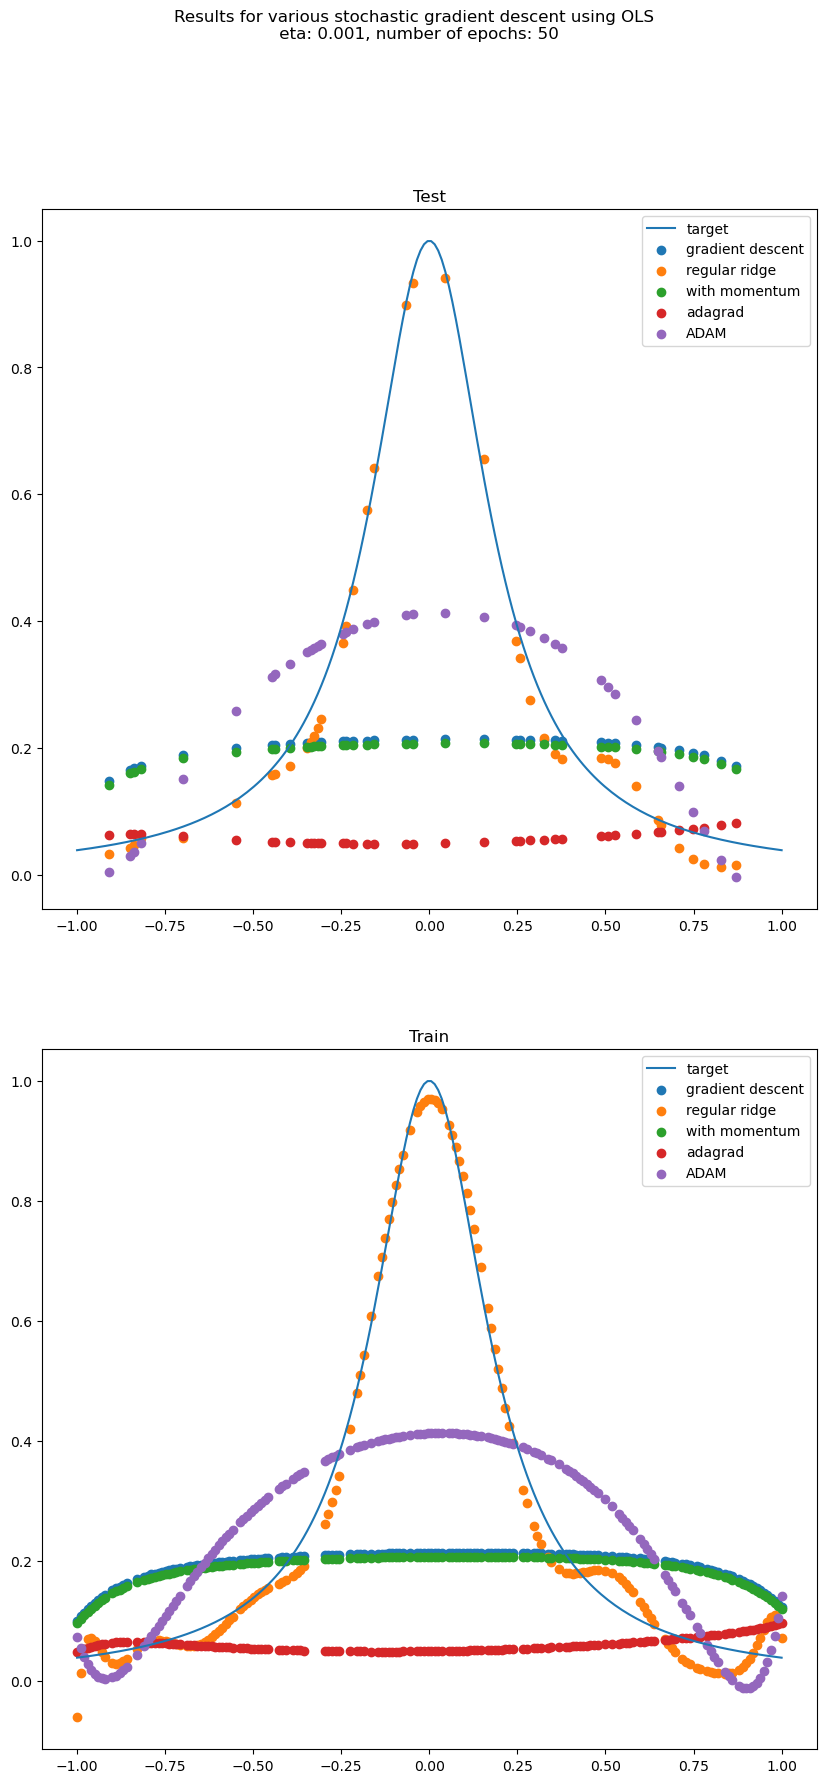

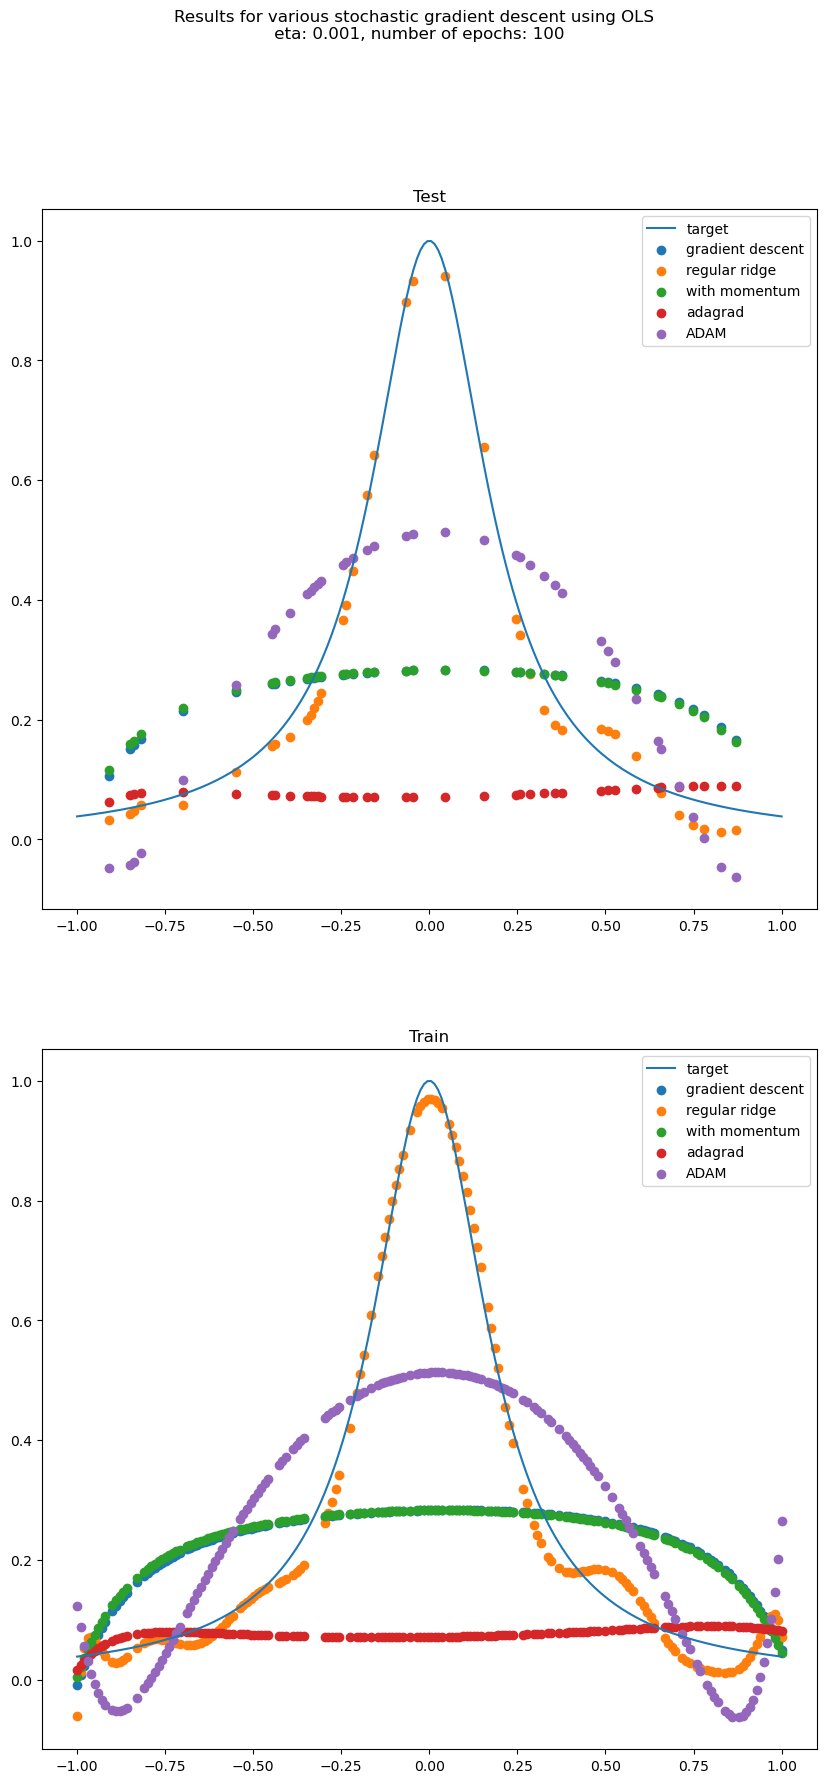

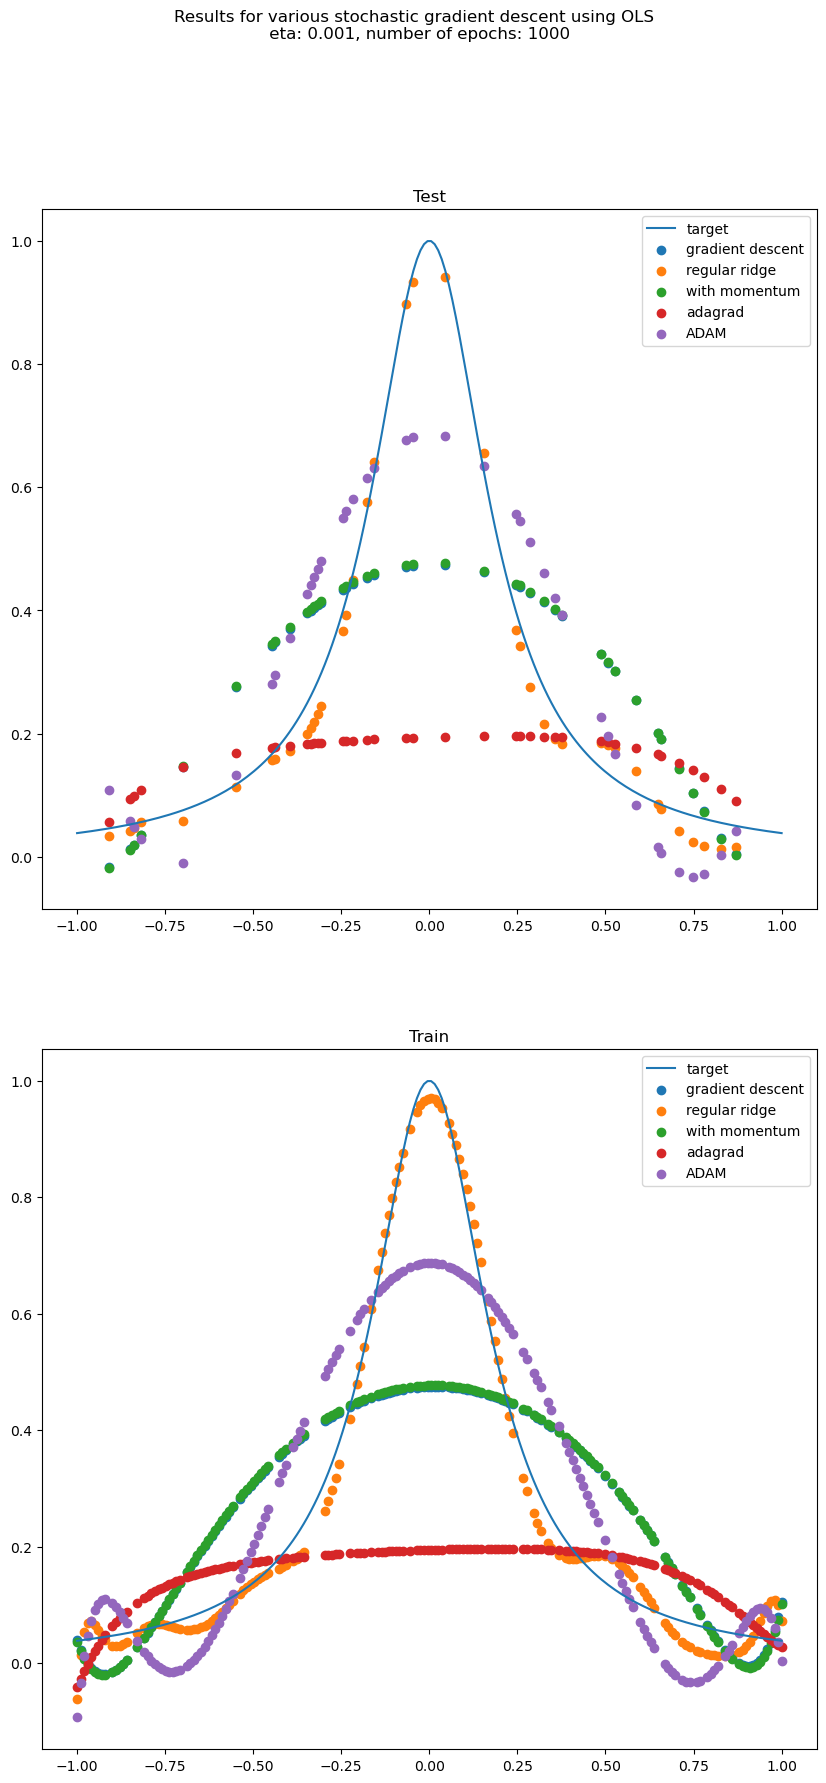

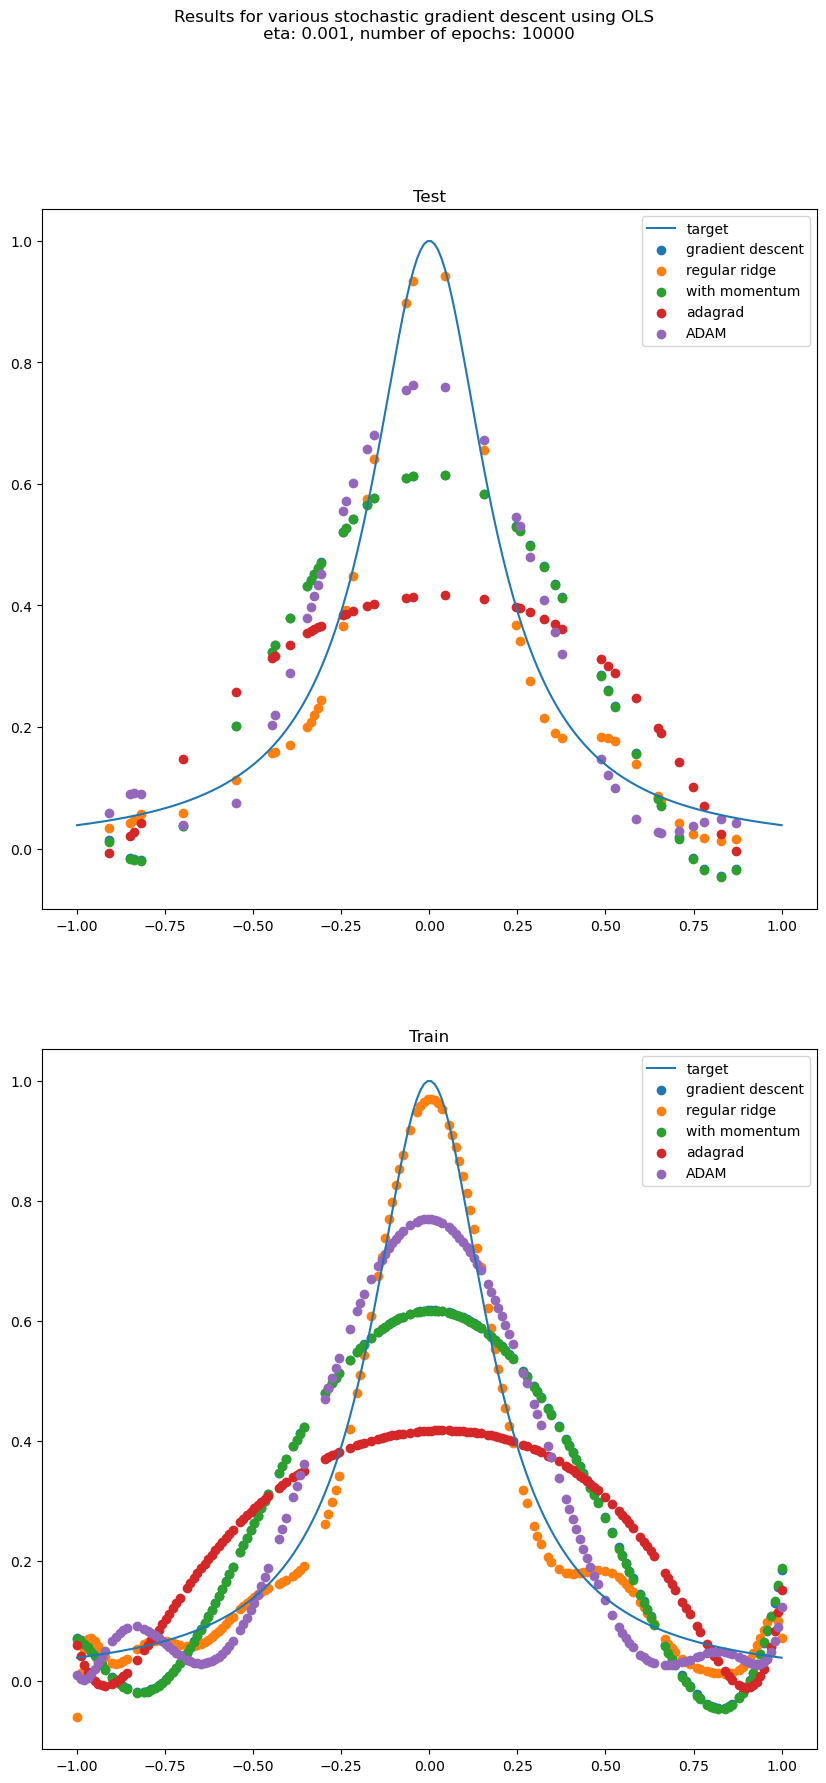

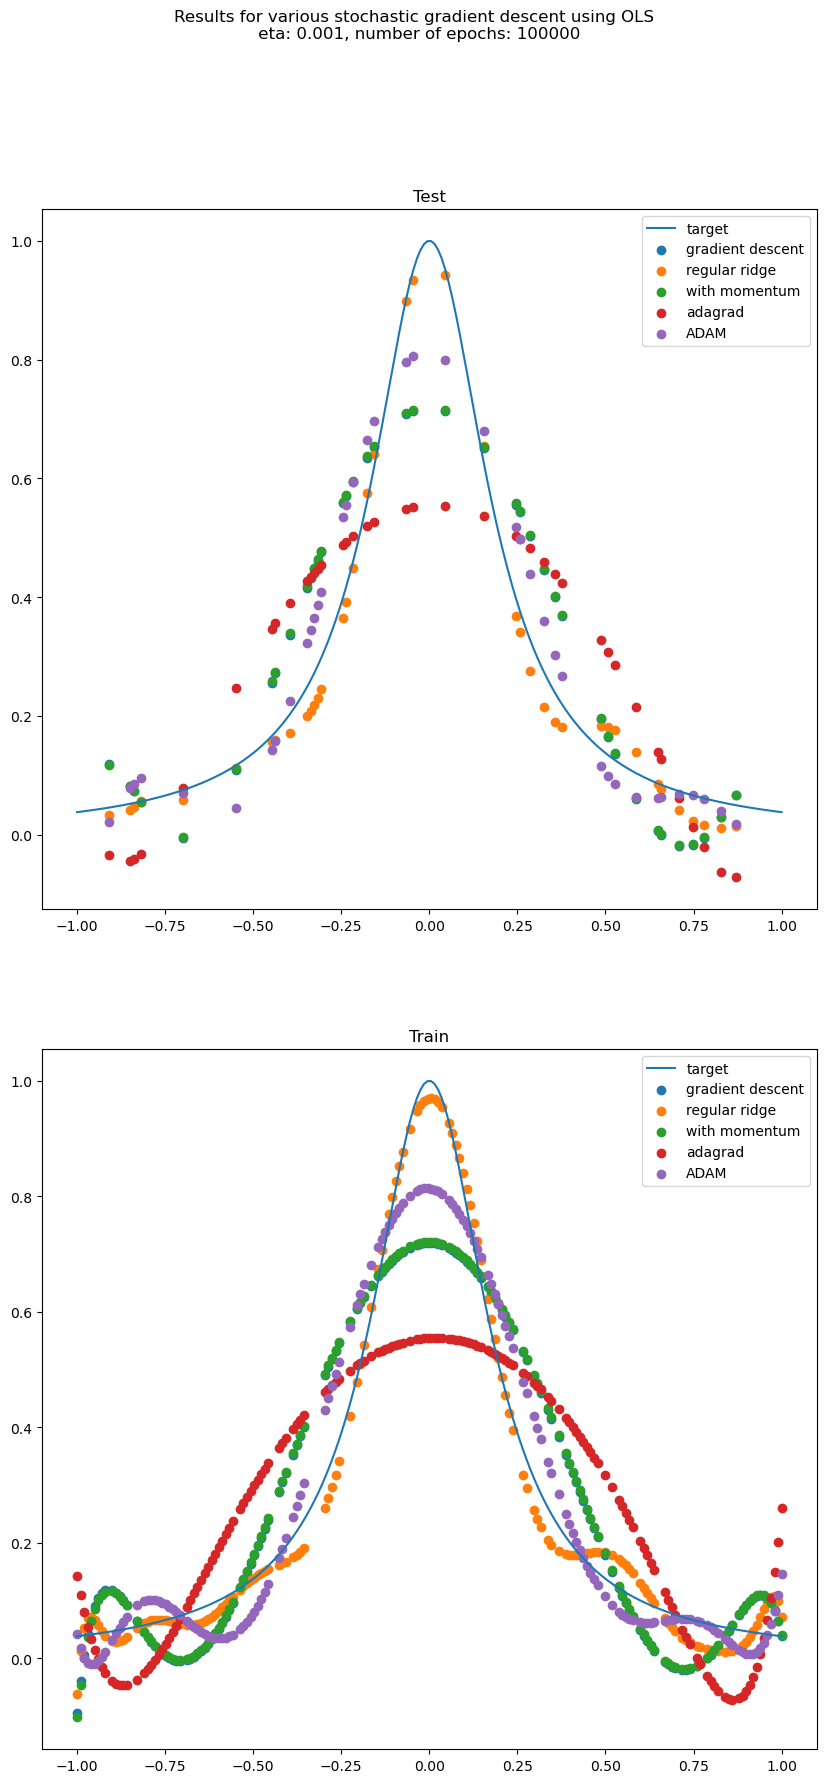

In [18]:
explore_n_epochs_stochasticGD_OLS(num_epochs,num_points,size_minibatch,eta,x,y,x_train_noise,x_test_noise,X_train_noise,X_test_noise,y_train_noise)
